<a href="https://colab.research.google.com/github/snlynnoo/2018-MachineLearning-Lectures-ESA/blob/master/Rainfall_Prediction_CP2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rainfall Prediction 

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Set max row and col for pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [84]:
# Import dataset
rf = pd.read_csv('/content/drive/MyDrive/Rainfall_Prediction_CP2_202302/rainfall_data.csv')

##Data Exploration


In [85]:
# Check Dataset's number of rows and columns
rf.shape

(13514, 15)

In [86]:
# Examine Types of variables in the dataset
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13514 non-null  object 
 1   temperature     13514 non-null  float64
 2   sun_dur         13514 non-null  float64
 3   shortwave_rad   13514 non-null  float64
 4   r_humidity      13514 non-null  float64
 5   cloud_covr      13514 non-null  float64
 6   pressure        13514 non-null  float64
 7   evapotrans      13514 non-null  float64
 8   soil_temp       13514 non-null  float64
 9   soil_moisture   13514 non-null  float64
 10  vapor_pressure  13514 non-null  float64
 11  wind_speed      13514 non-null  float64
 12  wind_dir        13514 non-null  float64
 13  wind_gust       13514 non-null  float64
 14  rainfall        13514 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.5+ MB


In [87]:
# View dataset
rf.head(10)

,date,temperature,sun_dur,shortwave_rad,r_humidity,cloud_covr,pressure,evapotrans,soil_temp,soil_moisture,vapor_pressure,wind_speed,wind_dir,wind_gust,rainfall
0,19850101T0000,17.24,581.98,4393.04,74.79,37.10,1015.48,2.64,16.06,0.28,5.62,0.93,289.26,2.00,0.0
1,19850102T0000,16.79,576.65,4733.91,73.79,20.18,1015.70,2.93,16.27,0.28,5.86,1.18,308.82,2.26,0.0
2,19850103T0000,15.96,424.92,4748.15,74.04,60.13,1015.85,2.92,17.05,0.27,5.94,0.92,265.89,1.91,0.0
3,19850104T0000,15.33,419.72,4887.88,75.29,37.93,1016.10,2.85,15.80,0.27,5.35,0.88,298.26,2.31,0.0
4,19850105T0000,15.49,514.05,4951.96,72.13,34.67,1015.27,2.94,17.16,0.27,5.92,1.04,286.70,2.19,0.0
5,19850106T0000,14.96,658.83,5155.77,61.25,0.00,1014.96,3.01,13.42,0.27,7.73,1.16,265.58,1.87,0.0
6,19850107T0000,14.87,612.33,4981.33,62.71,4.42,1016.38,2.88,13.31,0.26,7.31,1.15,310.45,2.07,0.0
7,19850108T0000,15.51,437.56,4981.33,70.42,22.37,1015.56,2.83,14.62,0.26,6.29,1.07,309.81,2.33,0.0
8,19850109T0000,15.22,579.62,5077.45,75.38,17.09,1016.01,2.75,14.76,0.26,5.43,1.03,307.25,1.80,0.0
9,19850110T0000,15.19,464.33,4913.69,76.13,41.00,1014.89,2.72,16.27,0.26,5.14,1.40,288.01,2.35,0.0


### Descriptive Statistics 

In [88]:
# Custom Function to generate descriptive statics
def describe_stats(df):
    desc = df.describe()
    skewness = df.skew()
    desc.loc['skewness'] = skewness
    median = df.median()
    desc.loc['median'] = median
    mode = df.mode()
    desc.loc['mode'] = mode.iloc[0]
    return desc

In [89]:
# Descriptive Statics of dataset 
describe_stats(rf).T

,count,mean,std,min,25%,50%,75%,max,skewness,median,mode
temperature,13514.0,19.715729,2.555507,9.82,18.3000,19.680,20.95,27.99,0.182687,19.680,19.82
sun_dur,13514.0,311.506376,265.469846,0.00,38.9775,264.420,590.36,791.17,0.235598,264.420,0.00
shortwave_rad,13514.0,3674.445676,1966.830989,408.51,1928.6300,3412.260,5347.12,7913.88,0.246104,3412.260,1199.72
r_humidity,13514.0,70.033351,21.861208,13.92,50.7900,76.670,89.00,97.79,-0.563480,76.670,95.63
cloud_covr,13514.0,55.573773,37.140209,0.00,17.8800,61.755,93.17,100.00,-0.233474,61.755,100.00
pressure,13514.0,1011.017662,3.788084,998.32,1008.1000,1011.030,1013.95,1022.80,-0.018639,1011.030,1009.55
evapotrans,13514.0,2.093273,0.861543,0.00,1.5500,2.050,2.61,5.81,0.302039,2.050,2.12
soil_temp,13514.0,20.386935,3.184127,10.07,18.5400,20.770,22.07,30.11,-0.210206,20.770,20.94
soil_moisture,13514.0,0.250021,0.077788,0.07,0.1800,0.280,0.31,0.37,-0.672137,0.280,0.31
vapor_pressure,13514.0,8.023877,6.629649,0.51,2.7600,5.750,11.99,31.40,0.989135,5.750,1.08


## Analysis of Variable

### Univariate Analysis

In [90]:
# Copy dataframe for data exploration without date variable
rf1 = rf.drop('date', axis =1)

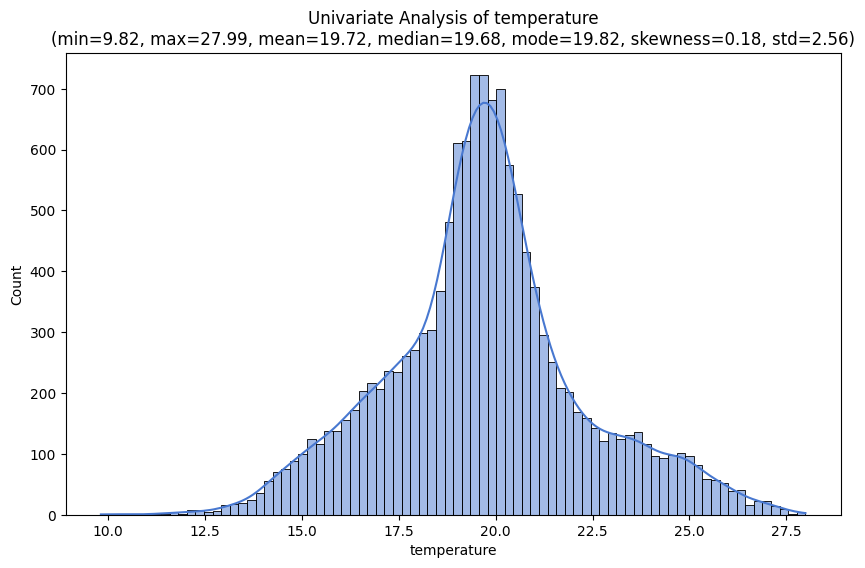

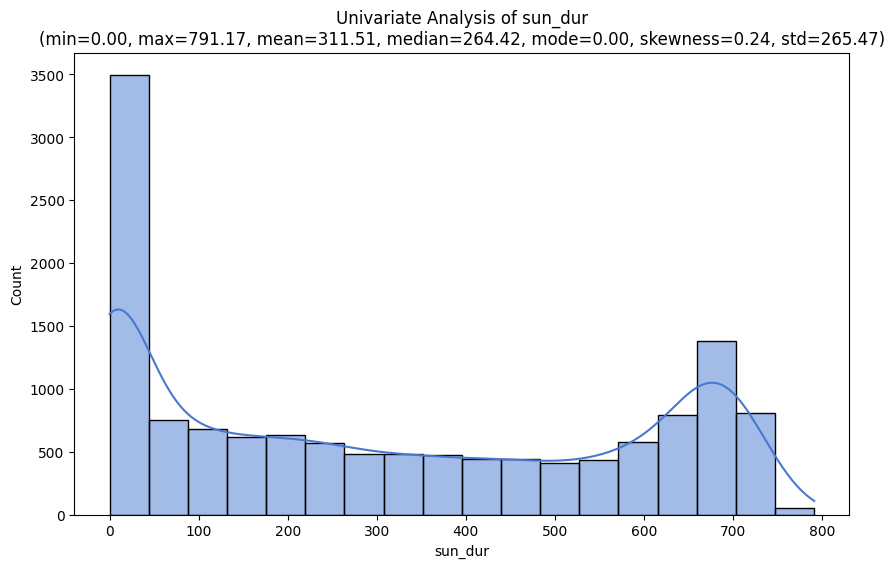

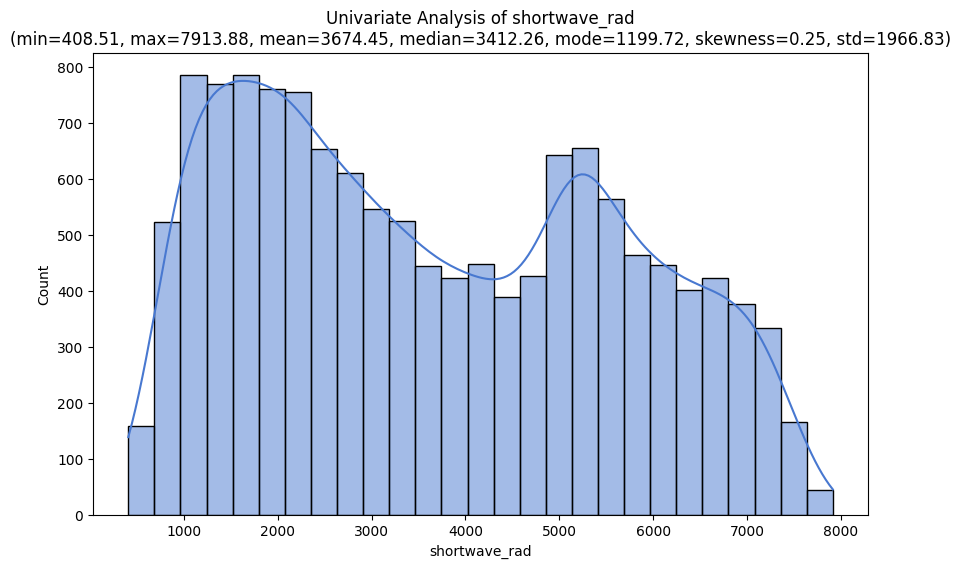

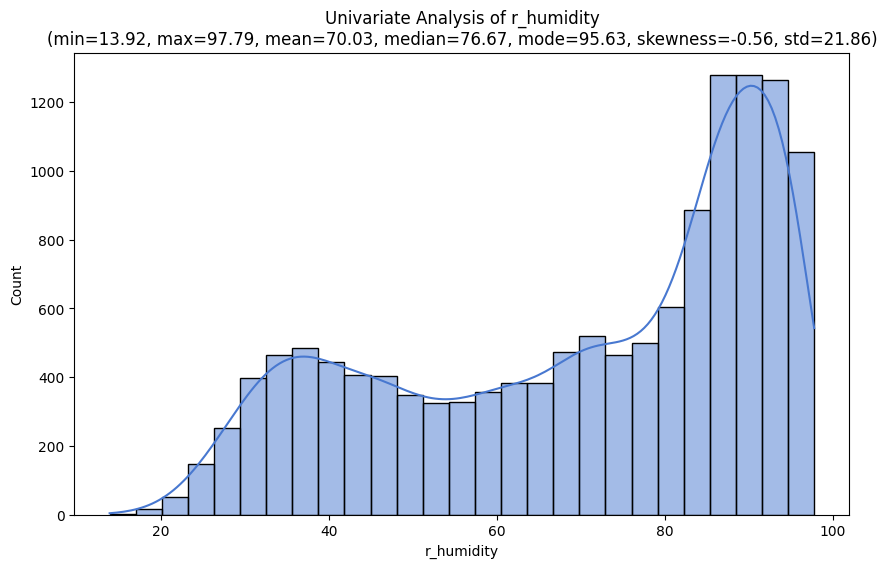

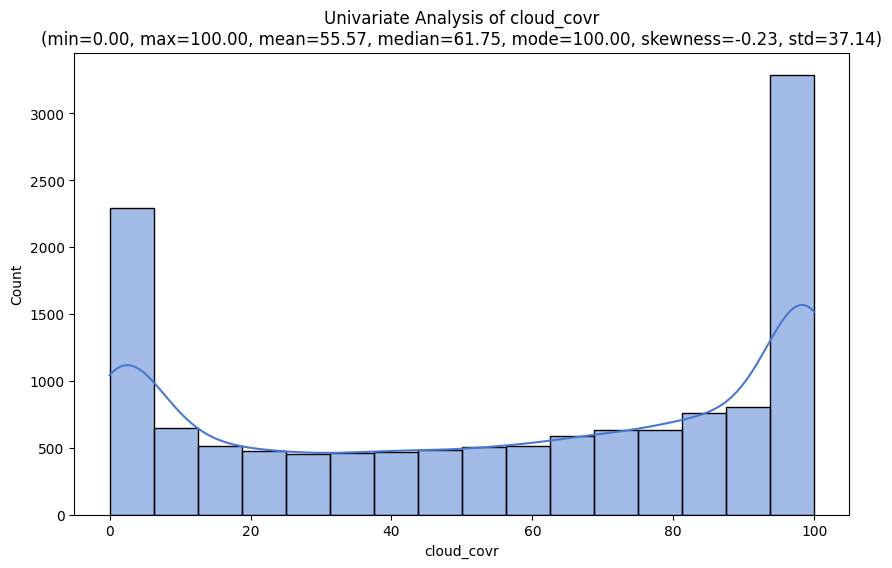

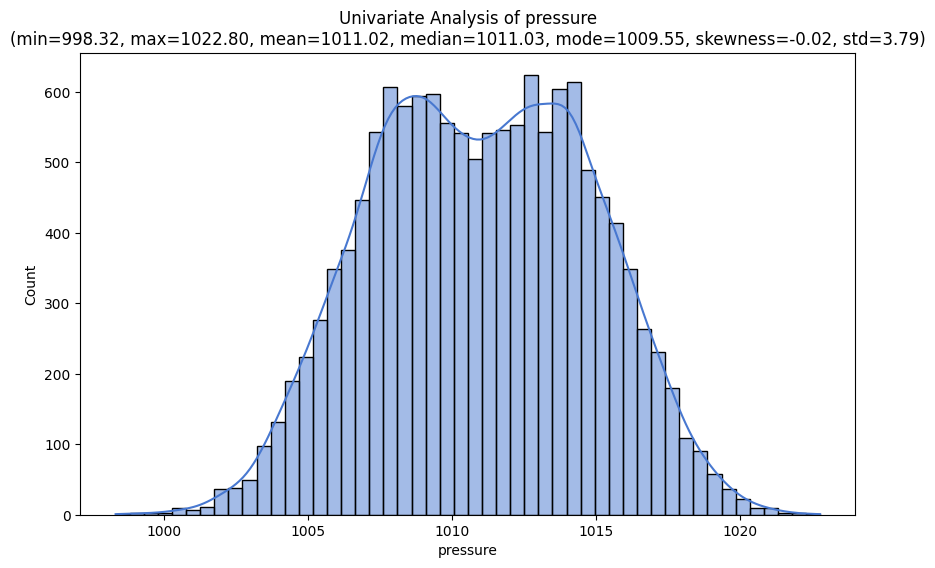

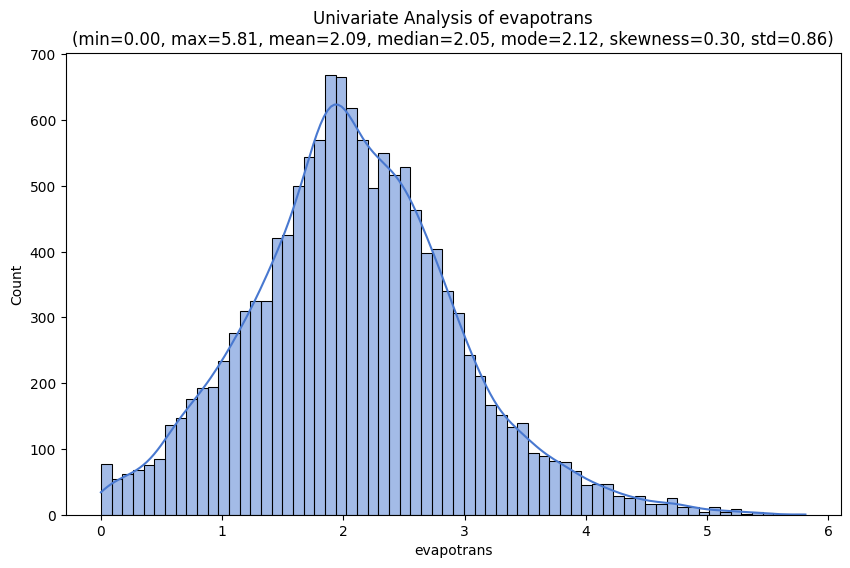

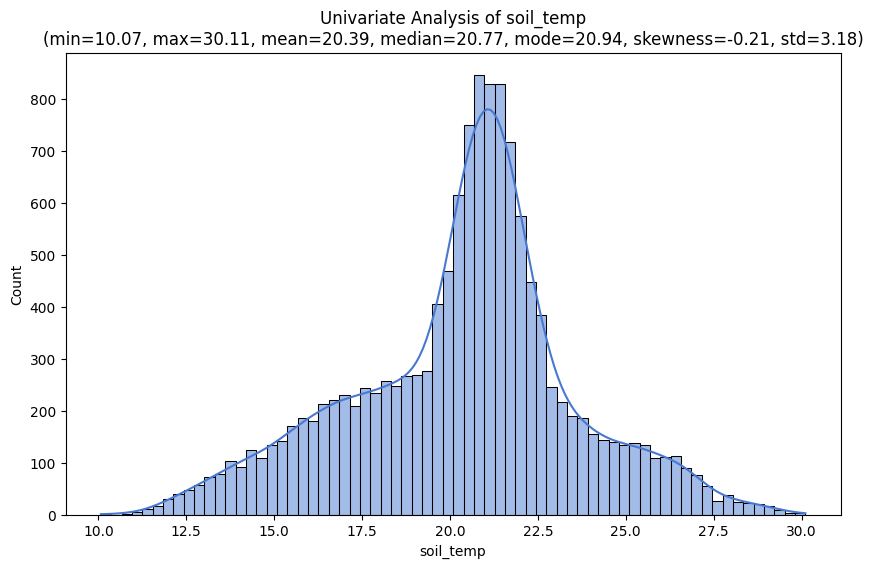

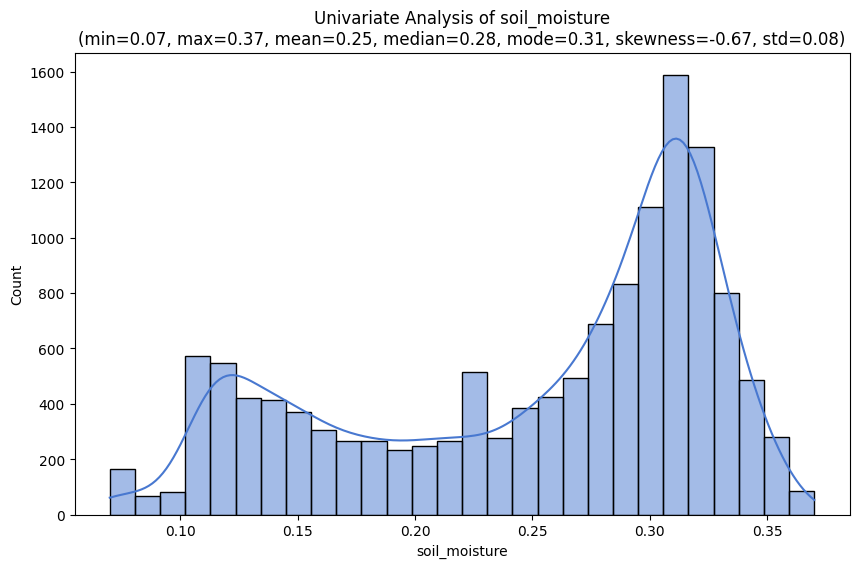

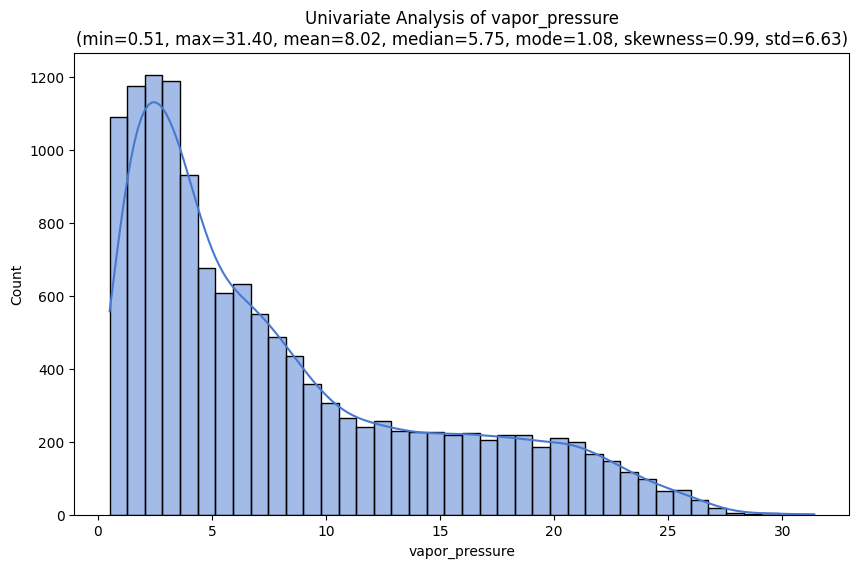

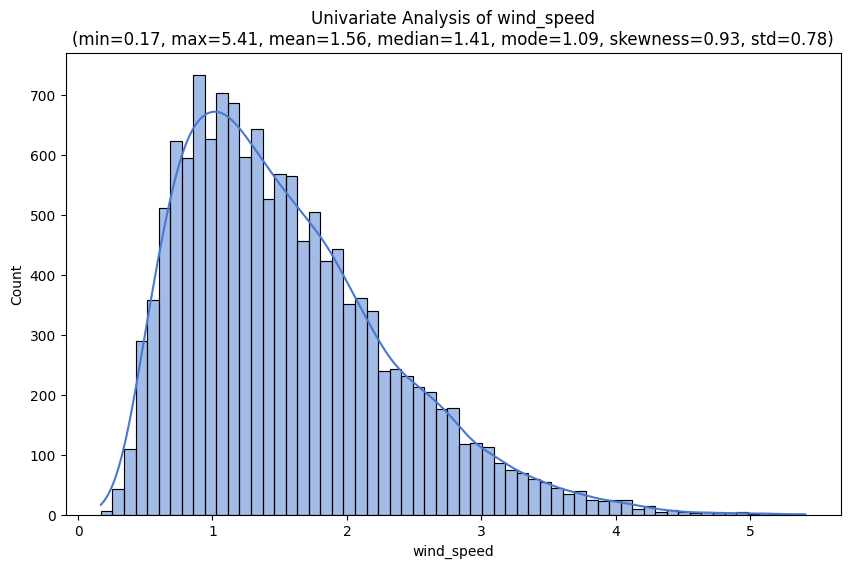

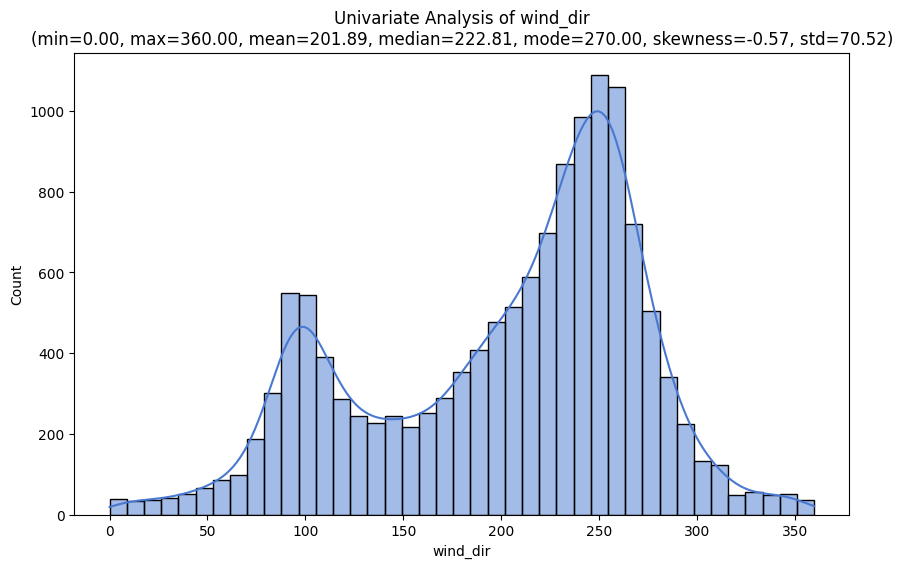

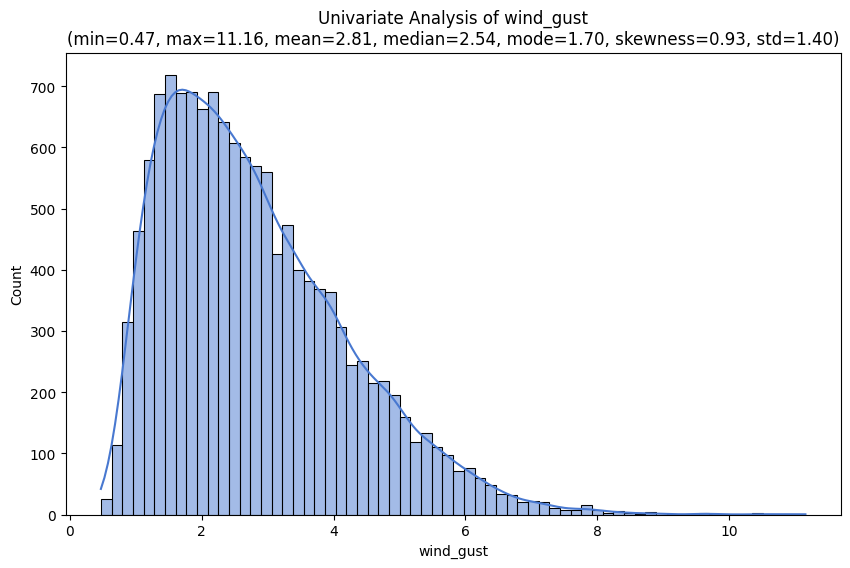

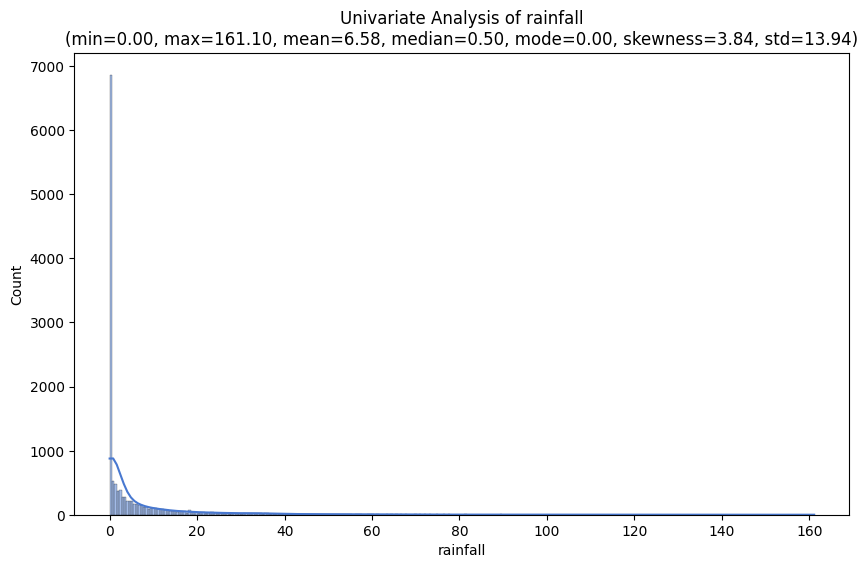

In [91]:
# Loop and create a separate histogram for each variable
sns.set_palette("muted", color_codes=True)
for col in rf1.columns:
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of current column
    sns.histplot(data=rf1, x=col, kde=True)
    
    # Compute the descriptive statistics
    col_min = rf1[col].min()
    col_max = rf1[col].max()
    col_mean = rf1[col].mean()
    col_median = rf1[col].median()
    col_mode = rf1[col].mode().iloc[0]
    col_skewness = rf1[col].skew()
    col_std = rf1[col].std()
    
    # Add axis labels and title with descriptive statistics
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Univariate Analysis of {col}\n(min={col_min:.2f}, max={col_max:.2f}, mean={col_mean:.2f}, median={col_median:.2f}, mode={col_mode:.2f}, skewness={col_skewness:.2f}, std={col_std:.2f})")
    
    # Display the plot
    plt.show()

### Bivariate Analysis

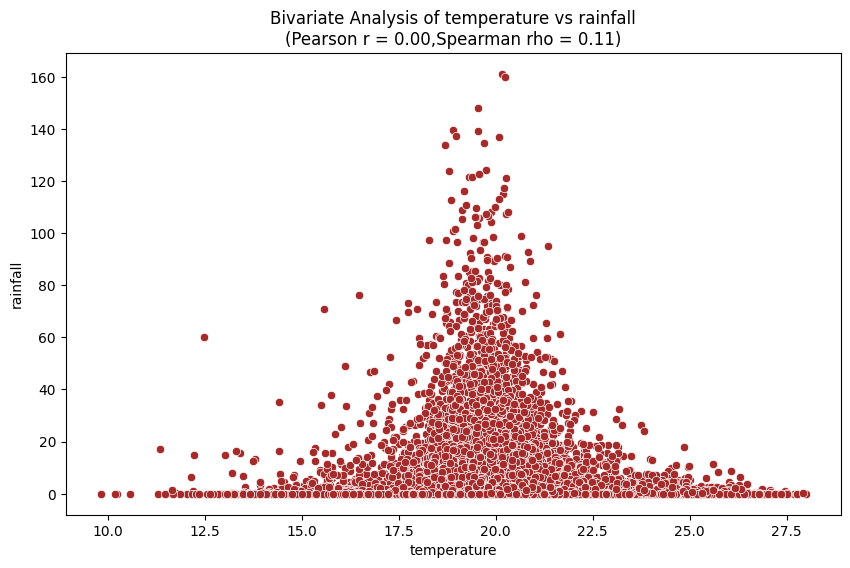

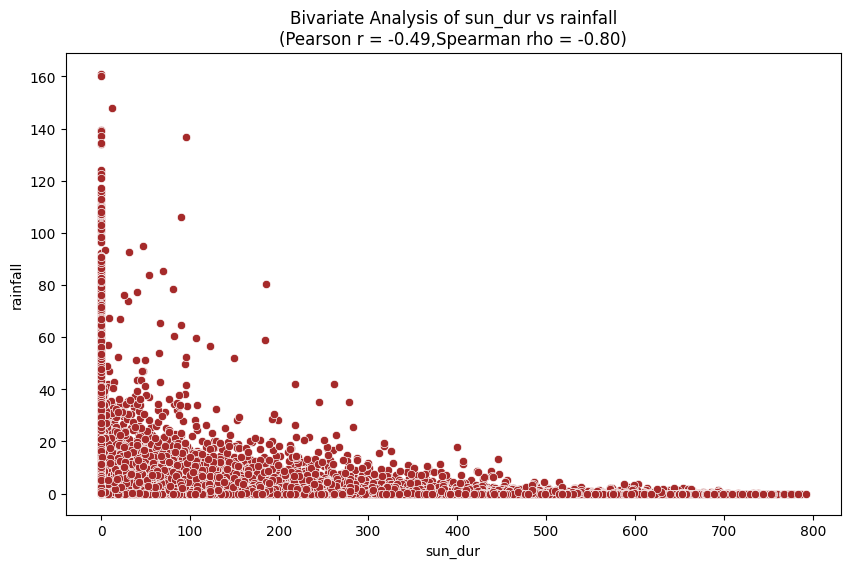

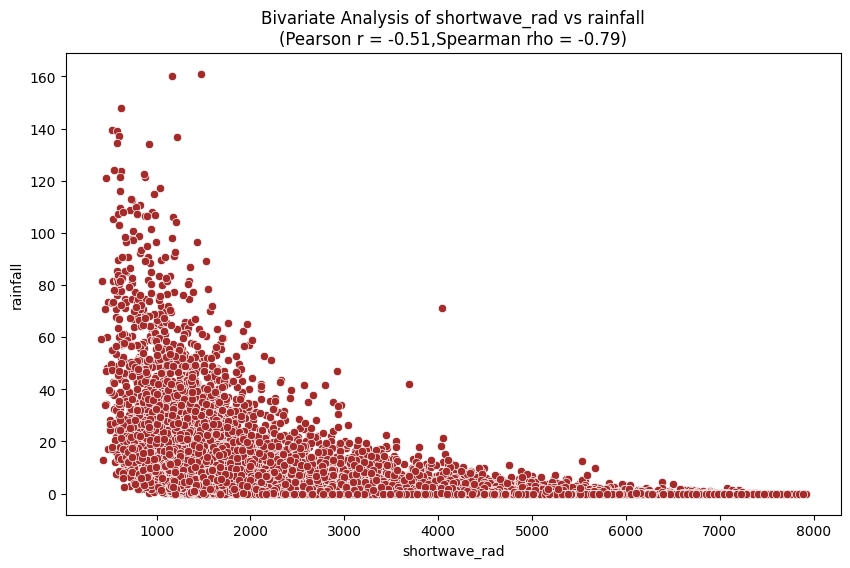

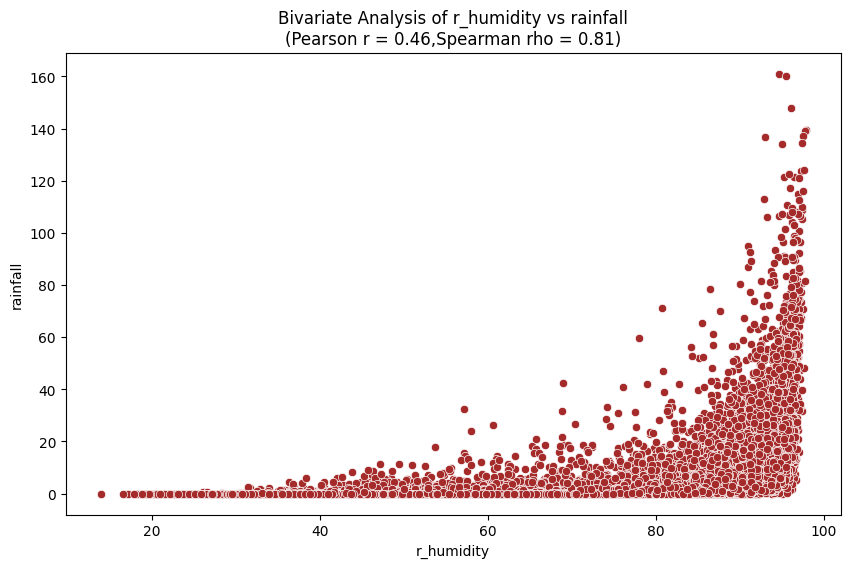

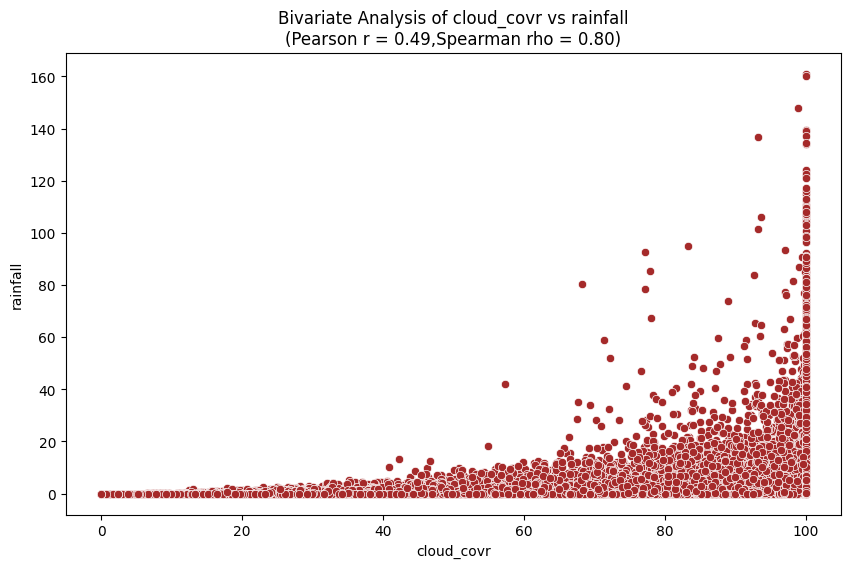

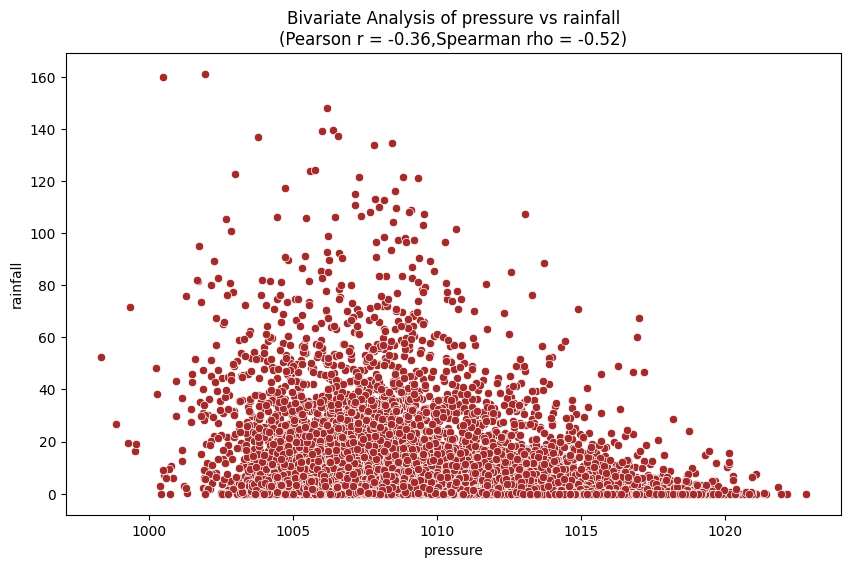

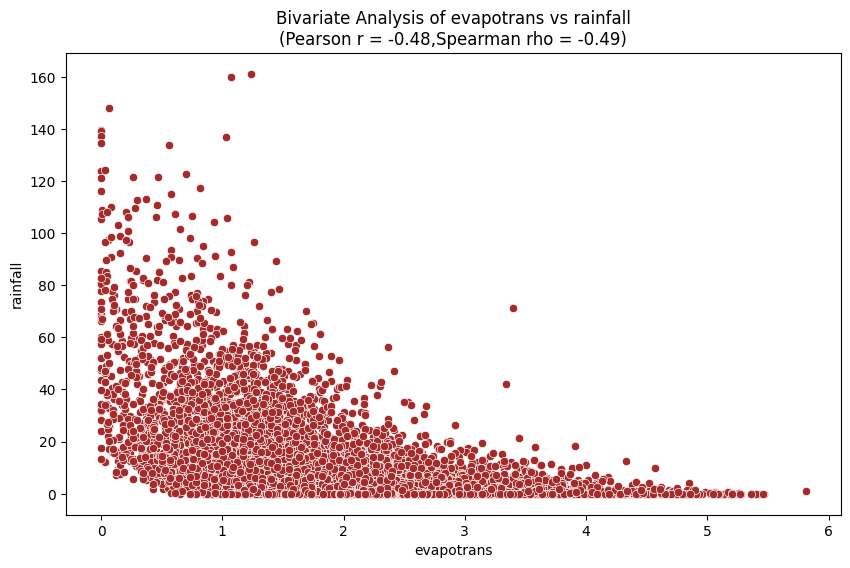

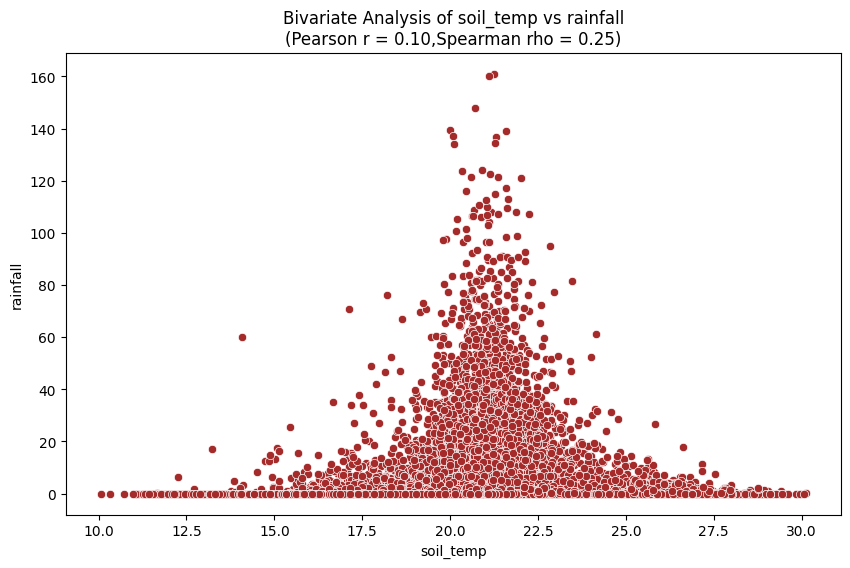

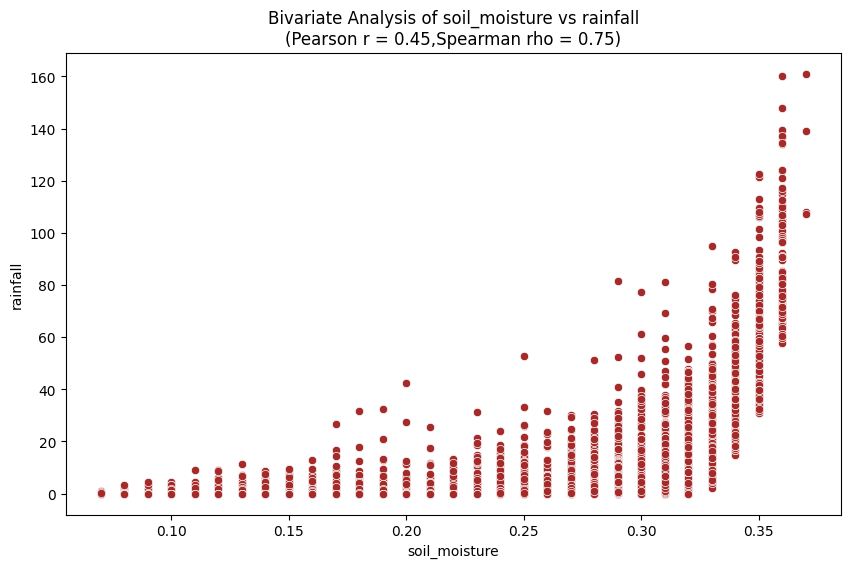

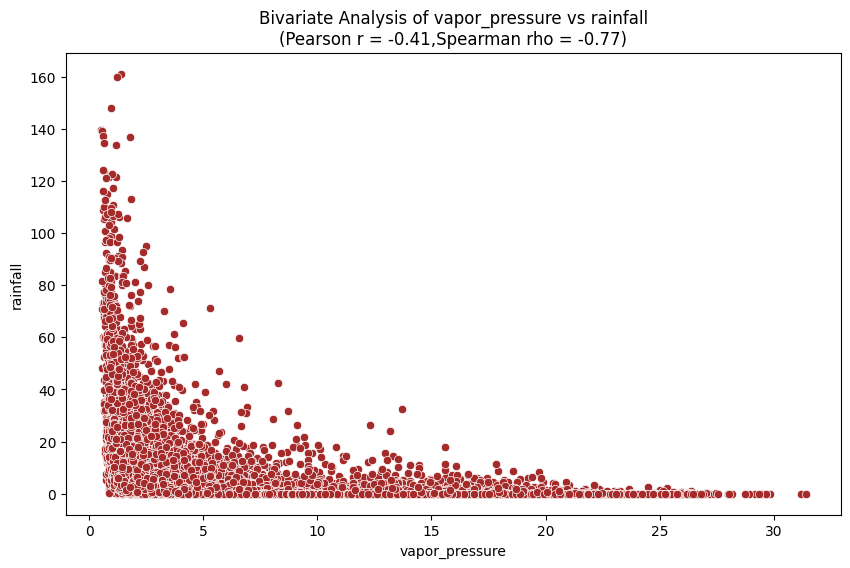

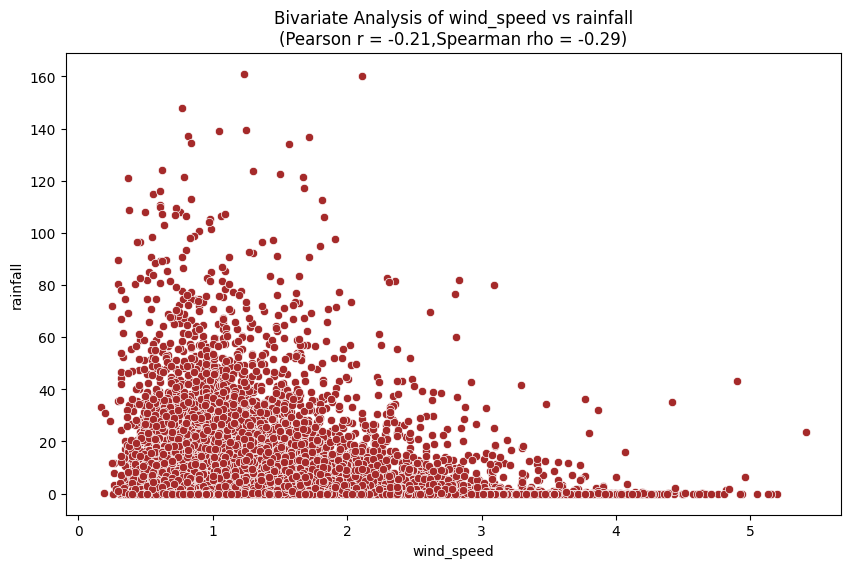

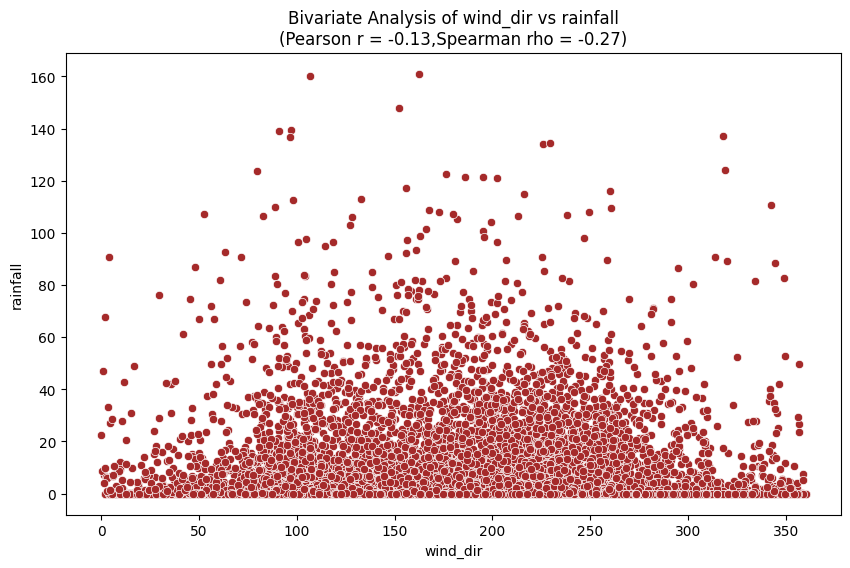

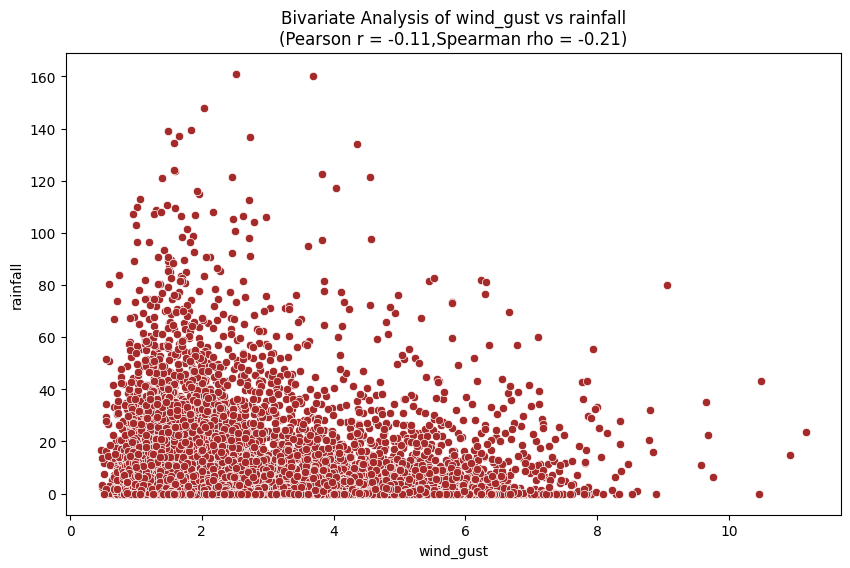

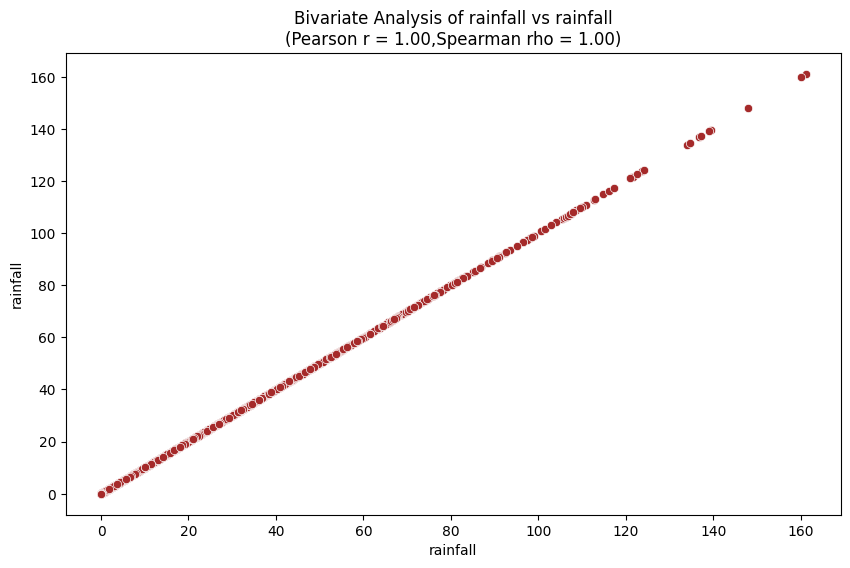

In [92]:
# Loop over each independent variable
for var in rf1.columns:
    plt.figure(figsize=(10, 6))
    # Create a scatter plot of the current variable against the dependent variable
    sns.scatterplot(x=rf1[var], y=rf1['rainfall'], color ='brown')
    
    # Compute the Pearson and Spearman correlations
    pearson_corr = rf1[[var, 'rainfall']].corr(method='pearson').iloc[0, 1]
    spearman_corr = rf1[[var, 'rainfall']].corr(method='spearman').iloc[0, 1]
    
    # Add title with correlation labels
    plt.title(f'Bivariate Analysis of {var} vs rainfall\n(Pearson r = {pearson_corr:.2f},Spearman rho = {spearman_corr:.2f})')
    plt.show()


## Anamalies Detection

#### Missing Values

In [93]:
# Checking missing values
rf.isnull().sum()

date              0
temperature       0
sun_dur           0
shortwave_rad     0
r_humidity        0
cloud_covr        0
pressure          0
evapotrans        0
soil_temp         0
soil_moisture     0
vapor_pressure    0
wind_speed        0
wind_dir          0
wind_gust         0
rainfall          0
dtype: int64

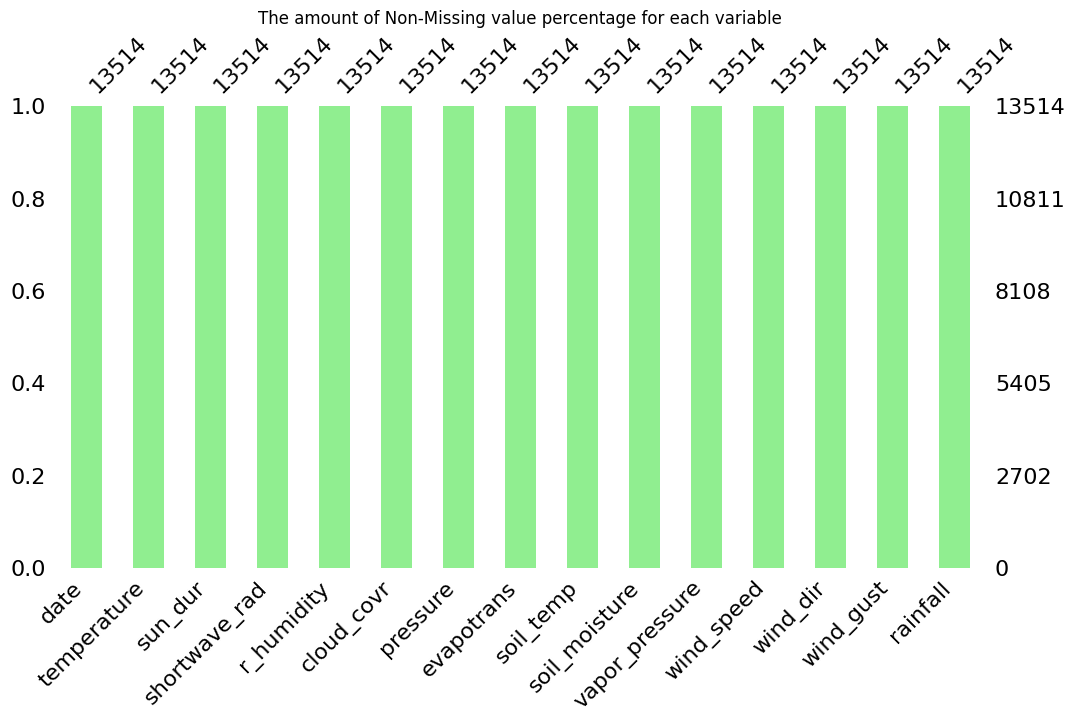

In [94]:
# Plot bar chart for non-missing values to spot the percentage of missing value in a variable
import missingno as msno
msno.bar(rf, color = 'lightgreen', figsize=(12, 6))
plt.title("The amount of Non-Missing value percentage for each variable")
plt.show()

#### Zero variance variables

In [95]:
# List out the variables that are having zero varience 
var_zero = list(rf.var()[rf.var() == 0].keys())
print(pd.DataFrame(var_zero))

Empty DataFrame
Columns: []
Index: []


#### Duplicate data

In [96]:
# Check duplicates
rf[rf.duplicated()== True].count()

date              0
temperature       0
sun_dur           0
shortwave_rad     0
r_humidity        0
cloud_covr        0
pressure          0
evapotrans        0
soil_temp         0
soil_moisture     0
vapor_pressure    0
wind_speed        0
wind_dir          0
wind_gust         0
rainfall          0
dtype: int64

#### Outliers detection using Box-Plot

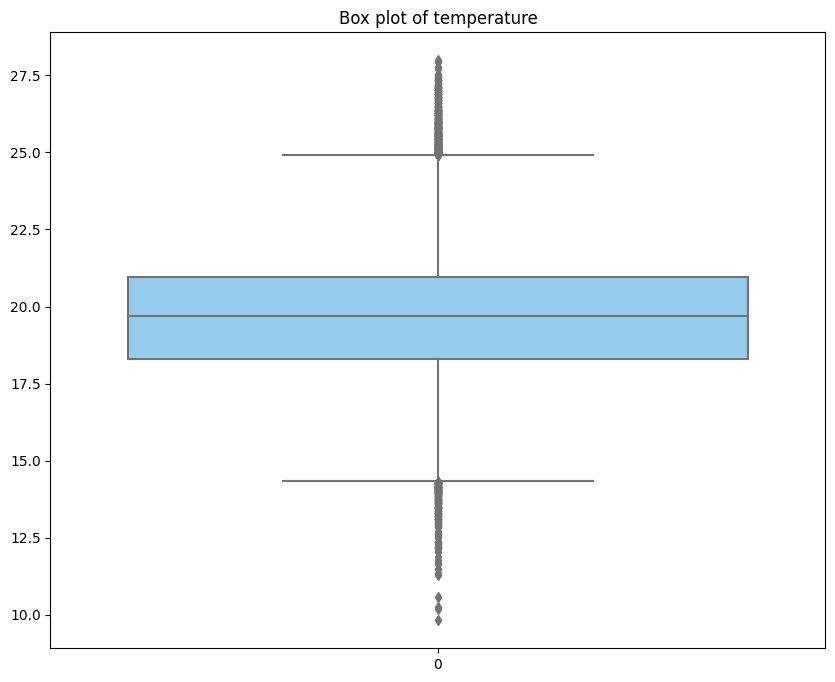

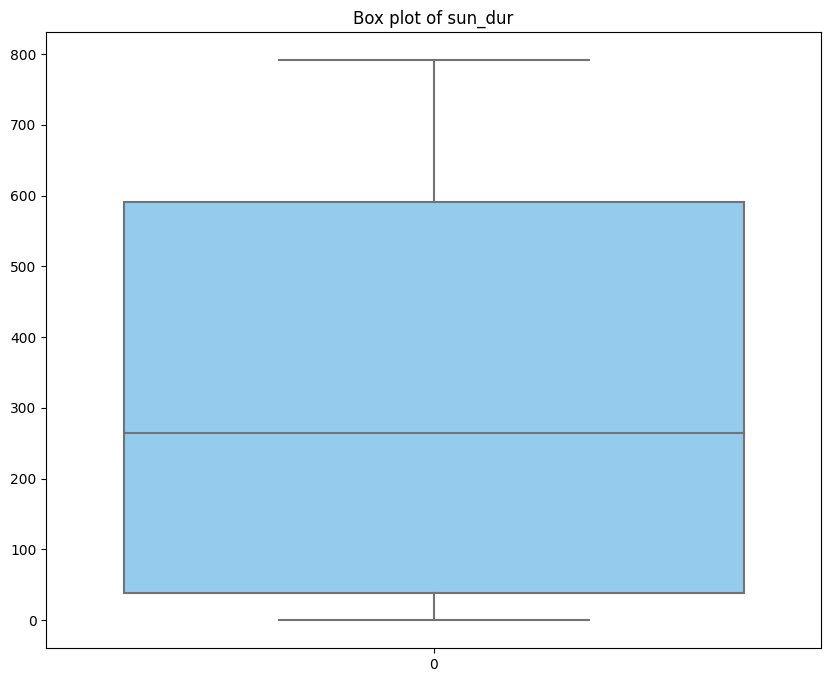

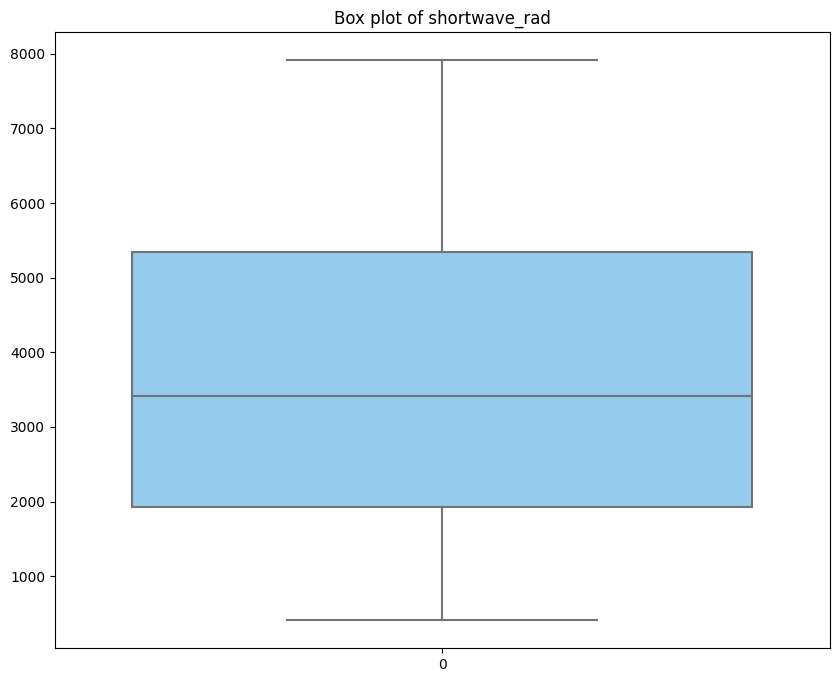

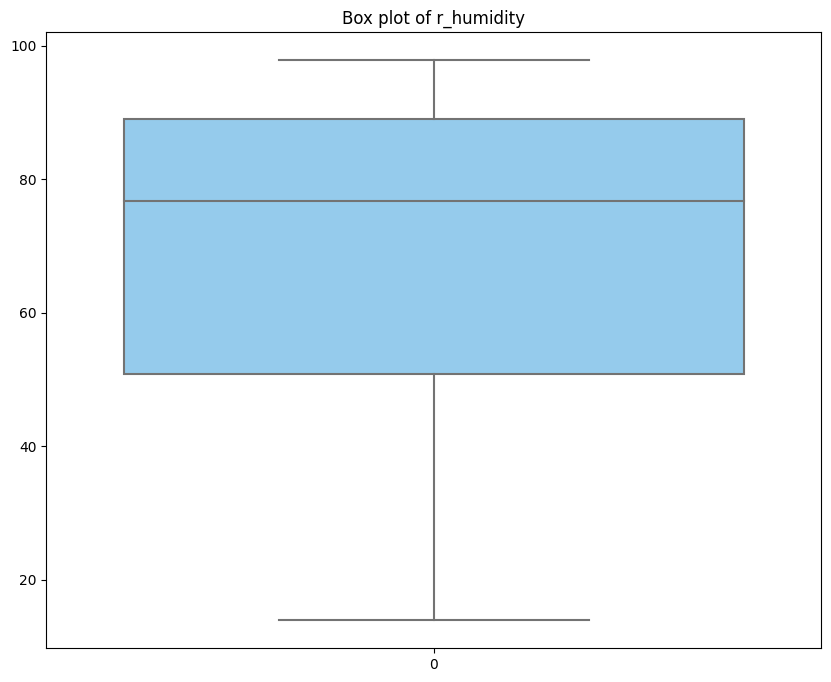

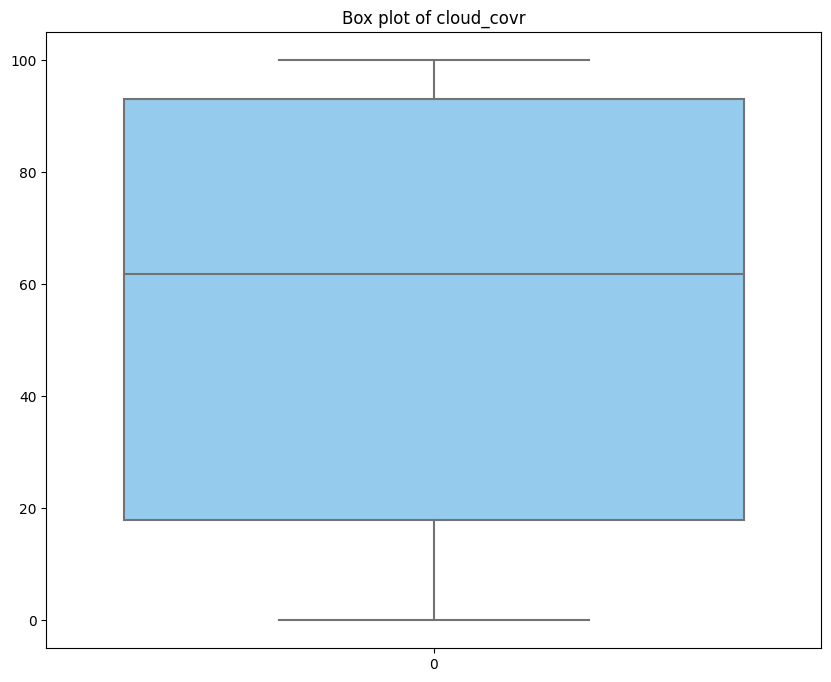

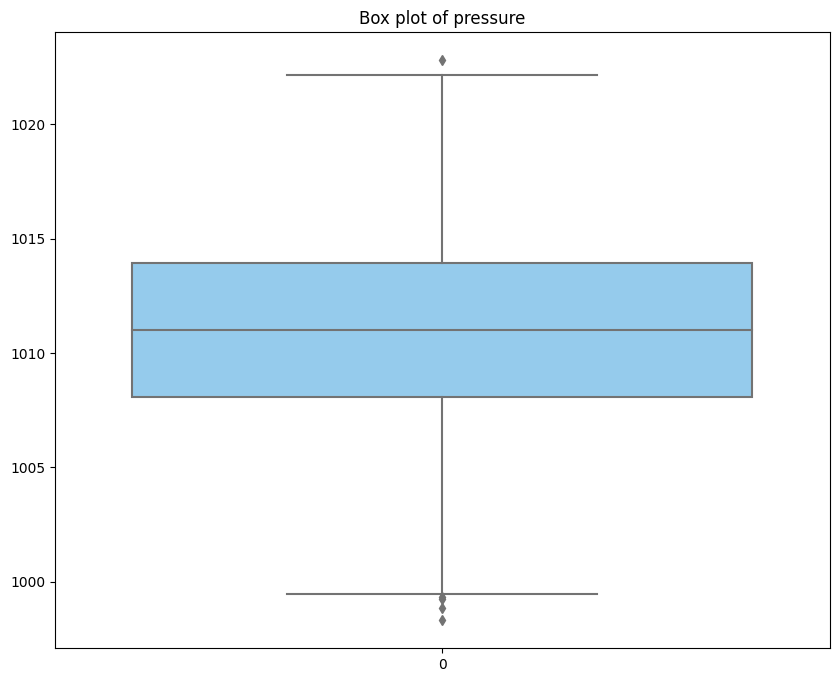

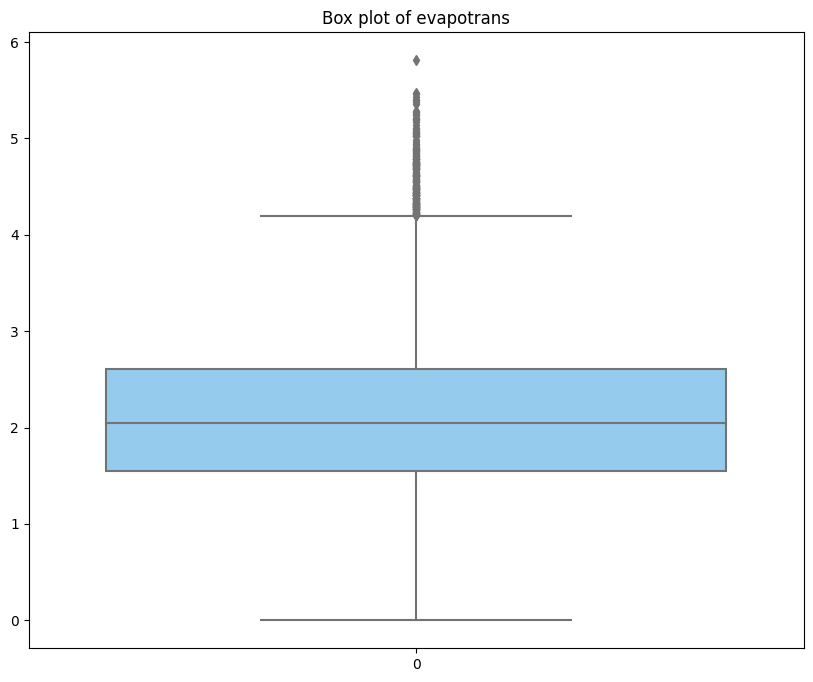

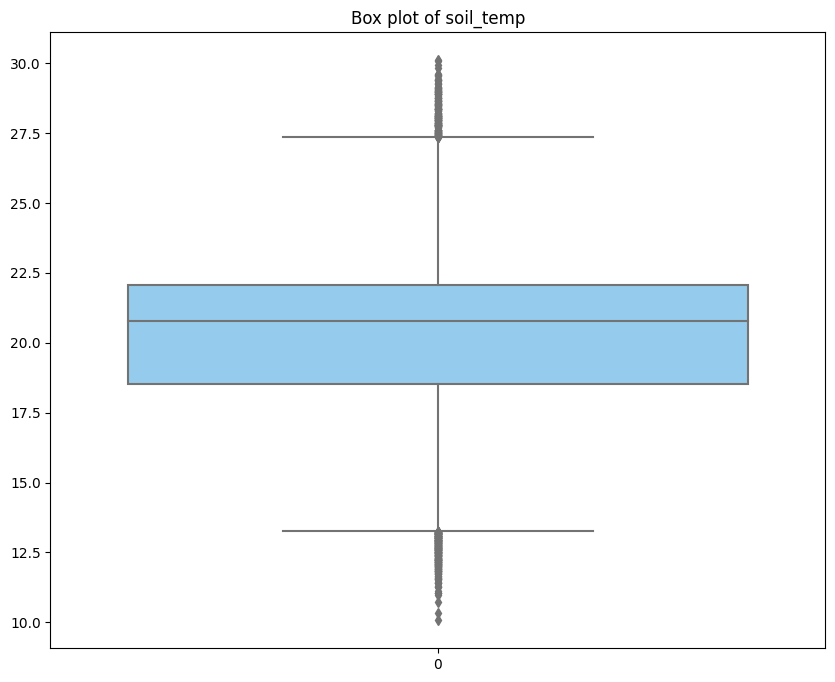

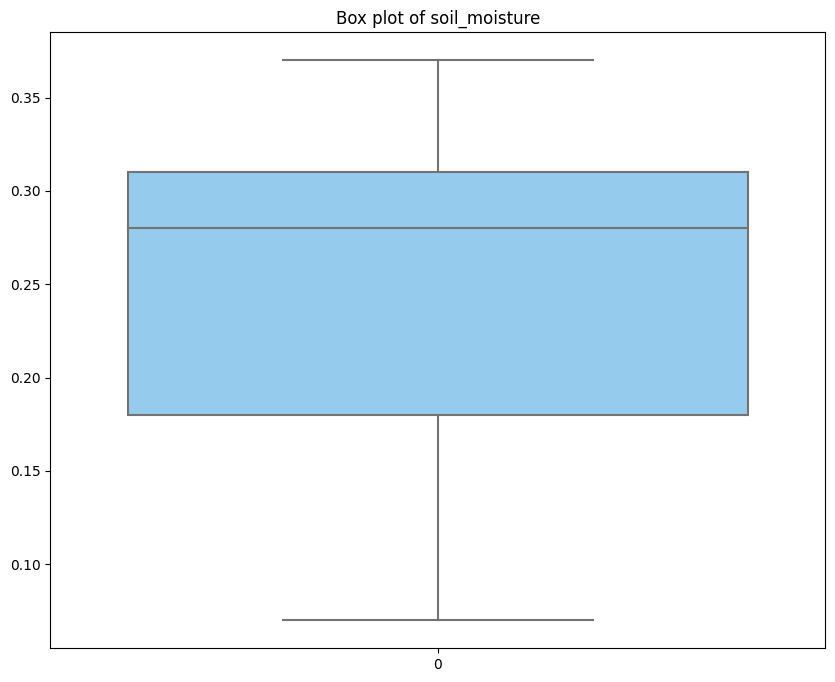

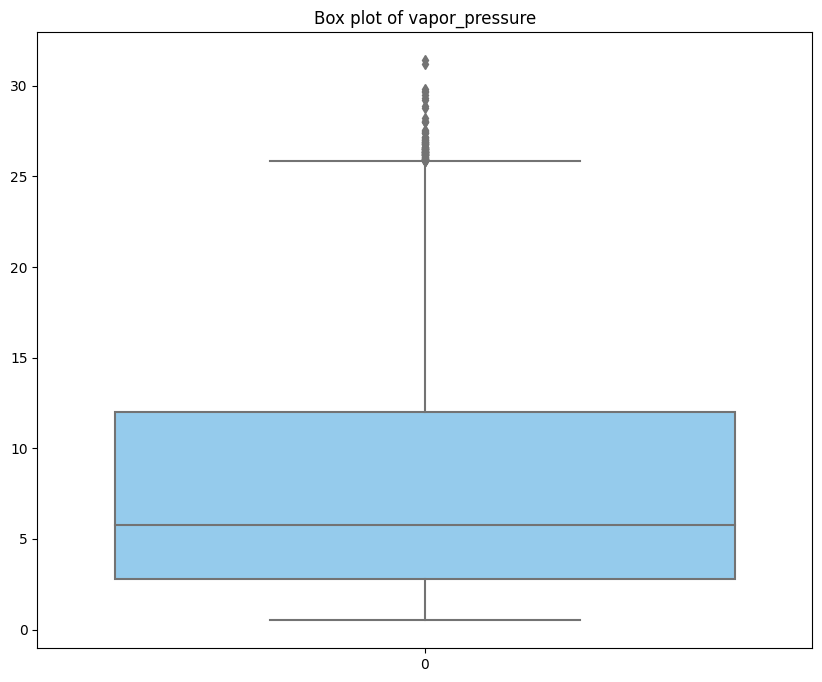

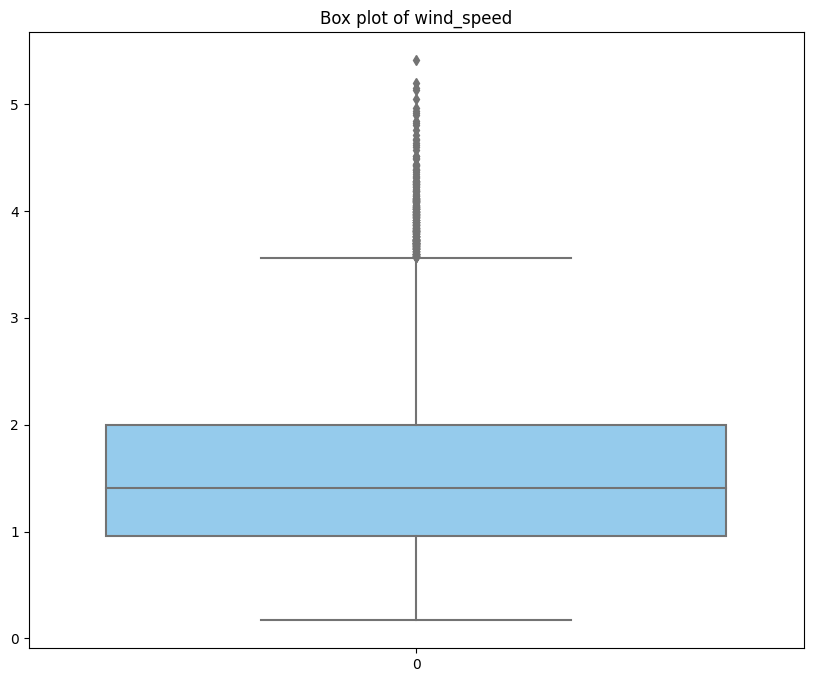

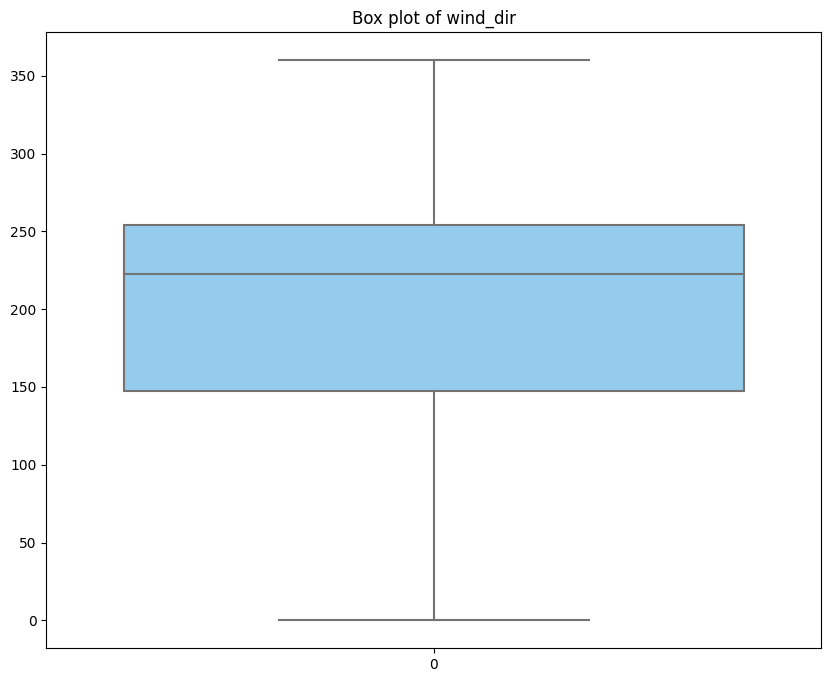

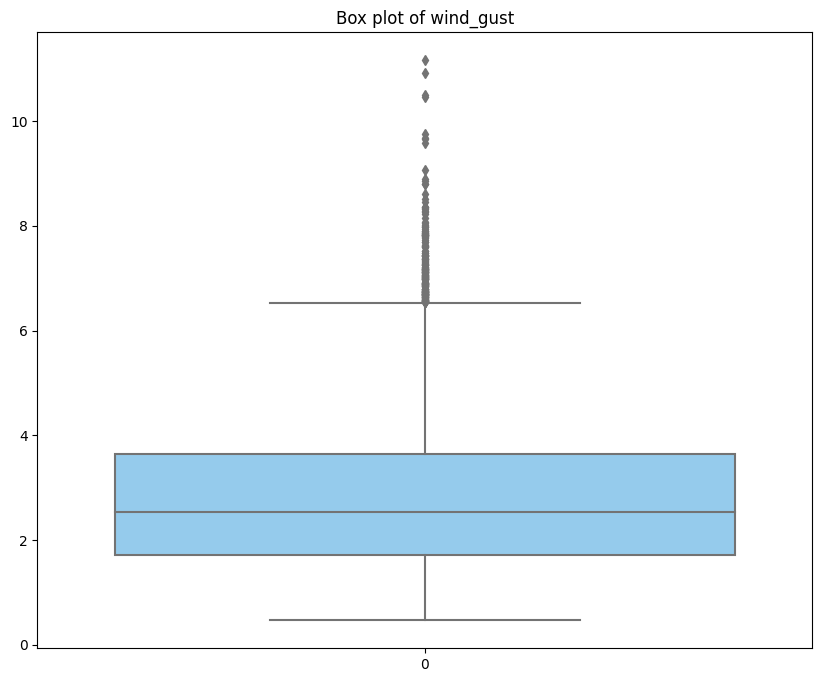

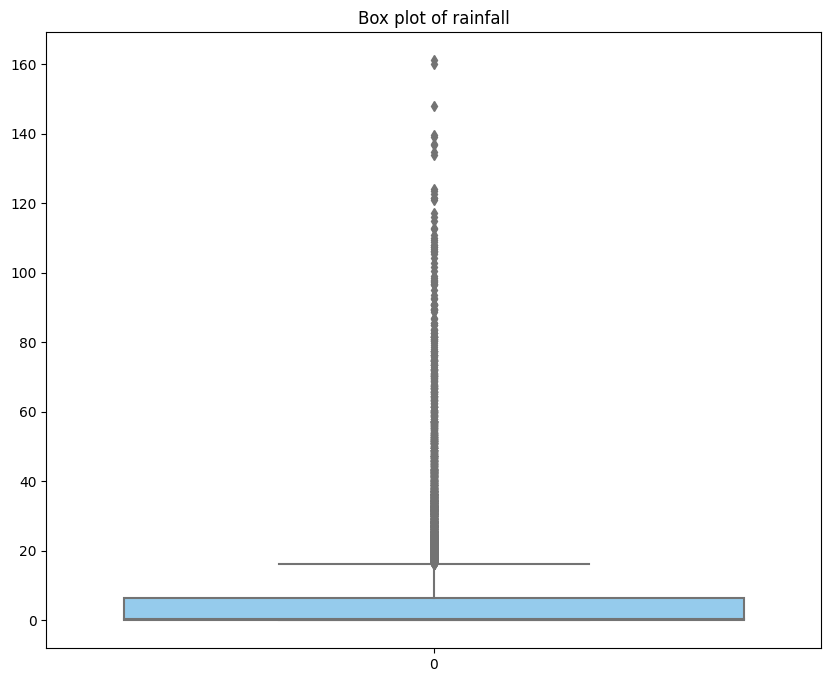

In [97]:
# Loop through each variable and create Box plots
for col in rf1.columns:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(data=rf1[col], ax=ax, color = 'lightskyblue')
    ax.set_title('Box plot of ' + col)
    plt.show()

### Outliers detection using Z-score Analysis

In [98]:
from scipy import stats

# Calculate the Z-score for the entire dataframe
z_scores = stats.zscore(rf1)

# Identify outliers using a Z-score threshold of 3
outliers = rf1.where(np.abs(z_scores) > 3)

# Print the outliers
print("Outliers: ", outliers.dropna())

Outliers:  Empty DataFrame
Columns: [temperature, sun_dur, shortwave_rad, r_humidity, cloud_covr, pressure, evapotrans, soil_temp, soil_moisture, vapor_pressure, wind_speed, wind_dir, wind_gust, rainfall]
Index: []


### Identifying Invalid data

In [99]:
# Identify wind direction having 0 or 360 degree
rf[(rf['wind_dir'] == 0) | (rf['wind_dir'] == 360)][['wind_dir']]

,wind_dir
4386,360.0
4702,360.0
7546,0.0


### Deep down into potential outliers

#### shortwave_rad Vs rainfall

In [100]:
# Query shortwave_rad values between 3500 to 4500 and rainfall values between 30 to 80 
rf.query('shortwave_rad.between(3500, 4500) and rainfall.between(30, 80)')[['shortwave_rad', 'rainfall']]

,shortwave_rad,rainfall
4528,4036.15,71.2
8303,3693.50,42.1


In [101]:
# Query shortwave_rad values between 2500 to 4500 and rainfall values between 30 to 80 
rf.query('shortwave_rad.between(2500, 4500) and rainfall.between(30, 80)')[['shortwave_rad', 'rainfall']]

,shortwave_rad,rainfall
148,2667.33,37.8
2119,2875.59,35.3
3151,2568.54,41.5
4528,4036.15,71.2
4579,2969.93,34.1
4611,2930.77,33.5
5217,2917.42,47.2
8303,3693.50,42.1
8914,2796.38,41.6
9748,2928.99,30.4


#### evapotrans Vs rainfall

In [102]:
# Query evapotrans values between 3 to 4 and rainfall values between 30 to 80 
rf.query('evapotrans.between(3, 4) and rainfall.between(30, 80)')[['evapotrans', 'rainfall']]

,evapotrans,rainfall
4528,3.40,71.2
8303,3.34,42.1


In [103]:
# Query evapotrans values between 3 to 4 and rainfall values between 30 to 80 
rf.query('evapotrans.between(2.5, 4) and rainfall.between(30, 80)')[['evapotrans', 'rainfall']]

,evapotrans,rainfall
2119,2.53,35.3
4528,3.40,71.2
4579,2.56,34.1
4611,2.68,33.5
8303,3.34,42.1
9748,2.66,30.4
12650,2.50,35.0


# Data Pre-processing


- No missing values 
- No zero variance
- No duplicate data
- No outliers are presents in the variables
- Imputation for invalid data in wind direction variable


#### Invalid data for wind_dir

In [104]:
# Identify wind direction having 0 or 360 degree
rf[(rf['wind_dir'] == 0) | (rf['wind_dir'] == 360)][['wind_dir']]

,wind_dir
4386,360.0
4702,360.0
7546,0.0


In [105]:
# replace zero value to 360 in the wind_dir variable
rf['wind_dir'] = rf['wind_dir'].replace(0, 360)

In [106]:
# Identify whether all the zero value are replaced with 360
rf[(rf['wind_dir'] == 0) | (rf['wind_dir'] == 360)][['wind_dir']]

,wind_dir
4386,360.0
4702,360.0
7546,360.0


In [107]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13514 non-null  object 
 1   temperature     13514 non-null  float64
 2   sun_dur         13514 non-null  float64
 3   shortwave_rad   13514 non-null  float64
 4   r_humidity      13514 non-null  float64
 5   cloud_covr      13514 non-null  float64
 6   pressure        13514 non-null  float64
 7   evapotrans      13514 non-null  float64
 8   soil_temp       13514 non-null  float64
 9   soil_moisture   13514 non-null  float64
 10  vapor_pressure  13514 non-null  float64
 11  wind_speed      13514 non-null  float64
 12  wind_dir        13514 non-null  float64
 13  wind_gust       13514 non-null  float64
 14  rainfall        13514 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.5+ MB


##Feature Engineering

New Features
- season_summer, season_rainy, season_winter
- wind_dir_sine, wind_dir_cos
- previous_rainfall

In [108]:
# Back up orginal dataset 
rf_fe = rf.copy()

In [109]:
# Convert '19850101T0000' to '1985-01-01' format
rf_fe['date'] = pd.to_datetime(rf_fe['date'], format='%Y%m%dT%H%M').dt.date

#### Three Seasons

In [110]:
# Define a function to assign season based on date
def get_season(date):
    year = date.year
    if (date >= pd.to_datetime(f'{year}-02-15')) and (date < pd.to_datetime(f'{year}-05-15')):
        return 'summer'
    elif (date >= pd.to_datetime(f'{year}-05-15')) and (date < pd.to_datetime(f'{year}-10-22')):
        return 'rainy'
    else:
        return 'winter'

# Apply the function to the date column and create a new season column
rf_fe['season'] = rf_fe['date'].apply(lambda x: get_season(pd.to_datetime(x)))

In [111]:
rf_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13514 non-null  object 
 1   temperature     13514 non-null  float64
 2   sun_dur         13514 non-null  float64
 3   shortwave_rad   13514 non-null  float64
 4   r_humidity      13514 non-null  float64
 5   cloud_covr      13514 non-null  float64
 6   pressure        13514 non-null  float64
 7   evapotrans      13514 non-null  float64
 8   soil_temp       13514 non-null  float64
 9   soil_moisture   13514 non-null  float64
 10  vapor_pressure  13514 non-null  float64
 11  wind_speed      13514 non-null  float64
 12  wind_dir        13514 non-null  float64
 13  wind_gust       13514 non-null  float64
 14  rainfall        13514 non-null  float64
 15  season          13514 non-null  object 
dtypes: float64(14), object(2)
memory usage: 1.6+ MB


In [112]:
# perform one-hot encoding
season_dummies = pd.get_dummies(rf_fe['season'], prefix='season')

# add the one-hot encoded variables to the original dataframe
rf_fe = pd.concat([rf_fe, season_dummies], axis=1)

#### Previous day rainfall

In [113]:
# (4) create previous day rainfall variable
rf_fe['previous_rainfall'] = rf_fe['rainfall'].shift(1)

In [114]:
# Drop the first observation which contains NA value
rf_fe.dropna(inplace=True)

In [115]:
rf_fe.shape

(13513, 20)

In [116]:
rf_fe['previous_rainfall'].skew()

3.839741219207025

In [117]:
import numpy as np

# Add a constant of 1 to all values in the "previous_rainfall" variable
rf_fe['previous_rainfall_transformed'] = rf_fe['previous_rainfall'] + 1

# Apply a log transformation to the "previous_rainfall_transformed" variable
rf_fe['previous_rainfall_transformed'] = np.log(rf_fe['previous_rainfall_transformed'])

# Check the skewness of the transformed variable
print("Skewness of previous_rainfall_transformed:", rf_fe['previous_rainfall_transformed'].skew())

Skewness of previous_rainfall_transformed: 0.8979584951707537


In [118]:
rf_fe['previous_rainfall'] = rf_fe['previous_rainfall_transformed']
rf_fe.drop('previous_rainfall_transformed', axis=1, inplace=True)

In [119]:
rf_fe['previous_rainfall'].skew()

0.8979584951707537

#### Wind direction

In [120]:
# Circular Feature Engineering to wind direction vairable
import numpy as np

# Compute sine and cosine of wind direction
rf_fe['wind_dir_sin'] = np.sin(np.radians(rf_fe['wind_dir']))
rf_fe['wind_dir_cos'] = np.cos(np.radians(rf_fe['wind_dir']))

# Drop original wind direction column
rf_fe.drop('wind_dir', axis=1, inplace=True)

In [121]:
# List the features in existing dataset 
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            13514 non-null  object 
 1   temperature     13514 non-null  float64
 2   sun_dur         13514 non-null  float64
 3   shortwave_rad   13514 non-null  float64
 4   r_humidity      13514 non-null  float64
 5   cloud_covr      13514 non-null  float64
 6   pressure        13514 non-null  float64
 7   evapotrans      13514 non-null  float64
 8   soil_temp       13514 non-null  float64
 9   soil_moisture   13514 non-null  float64
 10  vapor_pressure  13514 non-null  float64
 11  wind_speed      13514 non-null  float64
 12  wind_dir        13514 non-null  float64
 13  wind_gust       13514 non-null  float64
 14  rainfall        13514 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.5+ MB


In [122]:
# List all the features after feature engineering
rf_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13513 entries, 1 to 13513
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13513 non-null  object 
 1   temperature        13513 non-null  float64
 2   sun_dur            13513 non-null  float64
 3   shortwave_rad      13513 non-null  float64
 4   r_humidity         13513 non-null  float64
 5   cloud_covr         13513 non-null  float64
 6   pressure           13513 non-null  float64
 7   evapotrans         13513 non-null  float64
 8   soil_temp          13513 non-null  float64
 9   soil_moisture      13513 non-null  float64
 10  vapor_pressure     13513 non-null  float64
 11  wind_speed         13513 non-null  float64
 12  wind_gust          13513 non-null  float64
 13  rainfall           13513 non-null  float64
 14  season             13513 non-null  object 
 15  season_rainy       13513 non-null  uint8  
 16  season_summer      135

### Explanatory Data Analysis

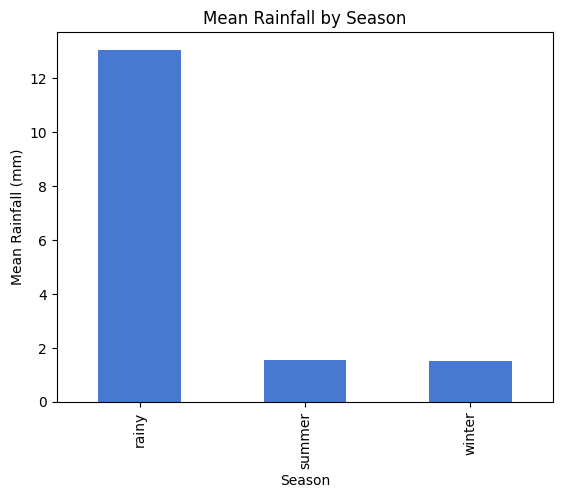

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by season and calculate the mean rainfall
seasonal_rainfall = rf_fe.groupby('season')['rainfall'].mean()

# Create a bar plot of the mean rainfall for each season
seasonal_rainfall.plot(kind='bar')
plt.title('Mean Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Mean Rainfall (mm)')
plt.show()

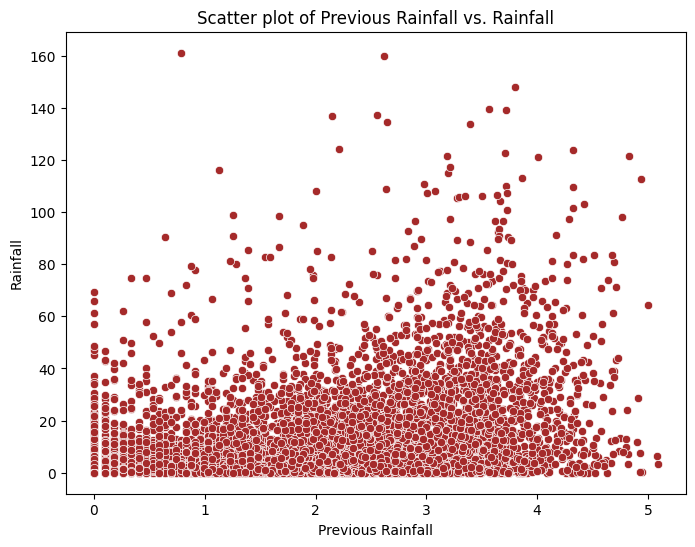

In [124]:
# create a scatter plot between 'previous rainfall' and 'rainfall' variable
plt.figure(figsize=(8,6))
sns.scatterplot(x='previous_rainfall', y='rainfall', data=rf_fe, color = 'brown')
plt.title('Scatter plot of Previous Rainfall vs. Rainfall')
plt.xlabel('Previous Rainfall')
plt.ylabel('Rainfall')
plt.show()

##Feature Selection

#### Correlaiton Analysis

In [125]:
# Back up and drop dependent variable to conduct correlation analysis among independent variables
rf_1 = rf.drop(['date','rainfall', 'soil_moisture', 'evapotrans'], axis=1)

<Axes: >

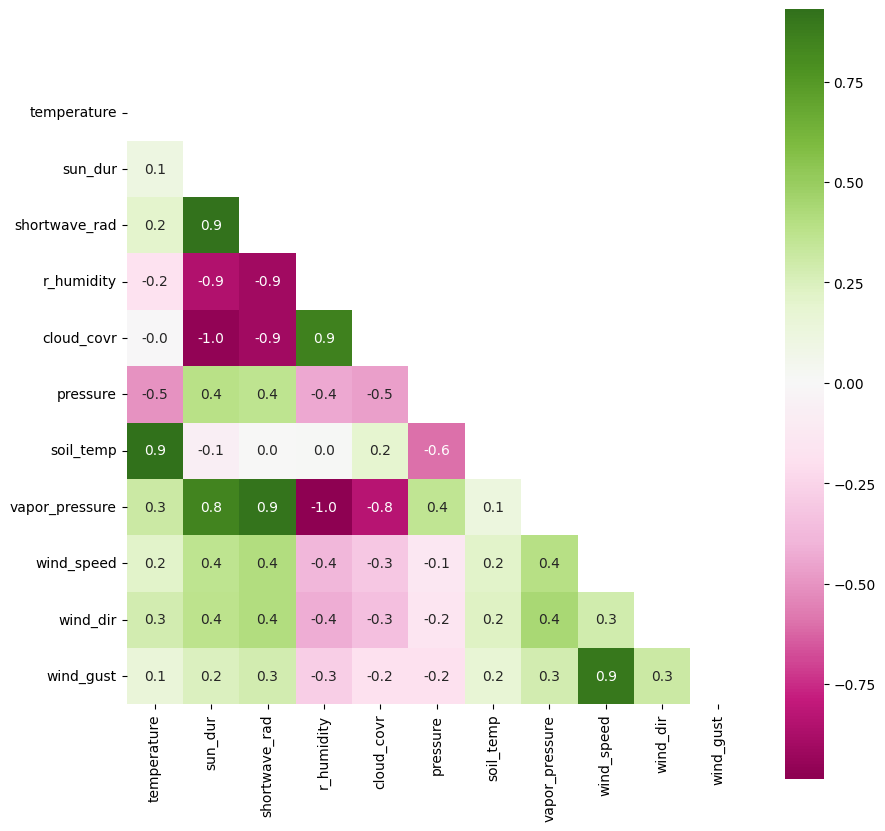

In [126]:
# Correlation plots for original dataset
import matplotlib.pyplot as plt
import seaborn as sns
correlations = rf_1.corr('spearman')
mask = np.triu(np.ones_like(correlations, dtype=bool))
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

In [127]:
# Generate a list of highly correlated variables with cut off >= 0.8
high_corr_vars = np.where(abs(correlations) >= 0.8)
high_corr_vars = [(correlations.columns[x], correlations.columns[y]) 
                  for x, y in zip(*high_corr_vars) if x != y and x < y]
df_high_corr_vars = pd.DataFrame({'Var_1': [x[0] for x in high_corr_vars],
                                  'Var_2': [x[1] for x in high_corr_vars]})
print(df_high_corr_vars)

            Var_1           Var_2
0     temperature       soil_temp
1         sun_dur   shortwave_rad
2         sun_dur      r_humidity
3         sun_dur      cloud_covr
4         sun_dur  vapor_pressure
5   shortwave_rad      r_humidity
6   shortwave_rad      cloud_covr
7   shortwave_rad  vapor_pressure
8      r_humidity      cloud_covr
9      r_humidity  vapor_pressure
10     cloud_covr  vapor_pressure
11     wind_speed       wind_gust


In [128]:
# List out variables to drop
highly_correlated_list = ['soil_temp','sun_dur','shortwave_rad',
                          'vapor_pressure','wind_gust','r_humidity']
# Dropping features
rf_1.drop(highly_correlated_list, axis = 1, inplace = True)

<Axes: >

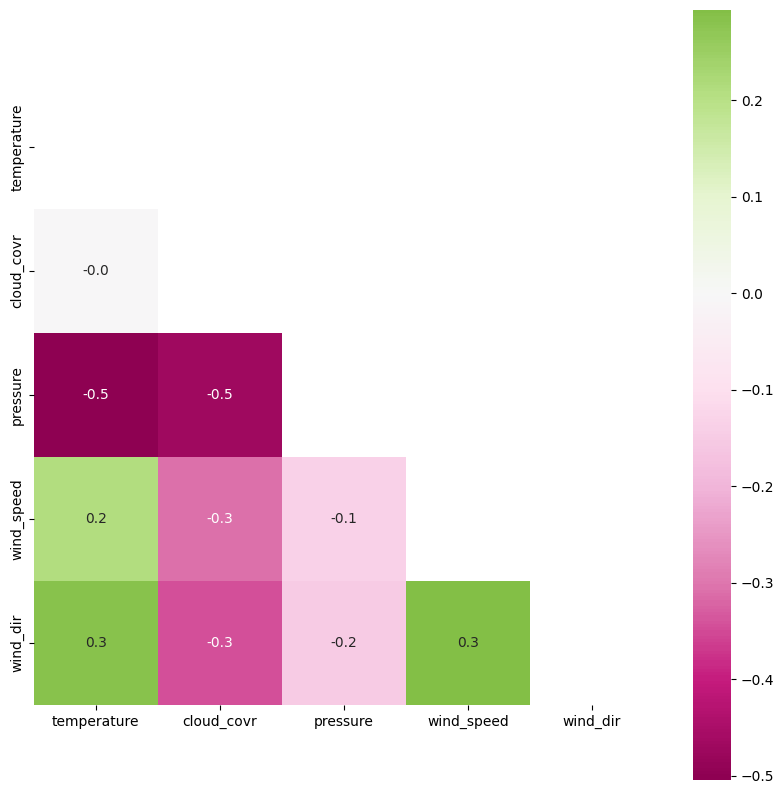

In [129]:
# Correlation plots for original dataset aftering dropping highly correlated variables
import matplotlib.pyplot as plt
import seaborn as sns
correlations = rf_1.corr('spearman')
mask = np.triu(np.ones_like(correlations, dtype=bool))
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

In [130]:
# Drop dependent variable to conduct correlation analysis among independent variables
rf_1_fe = rf_fe.drop(['date', 'rainfall', 'season', 'soil_moisture', 'evapotrans'], axis=1)

<Axes: >

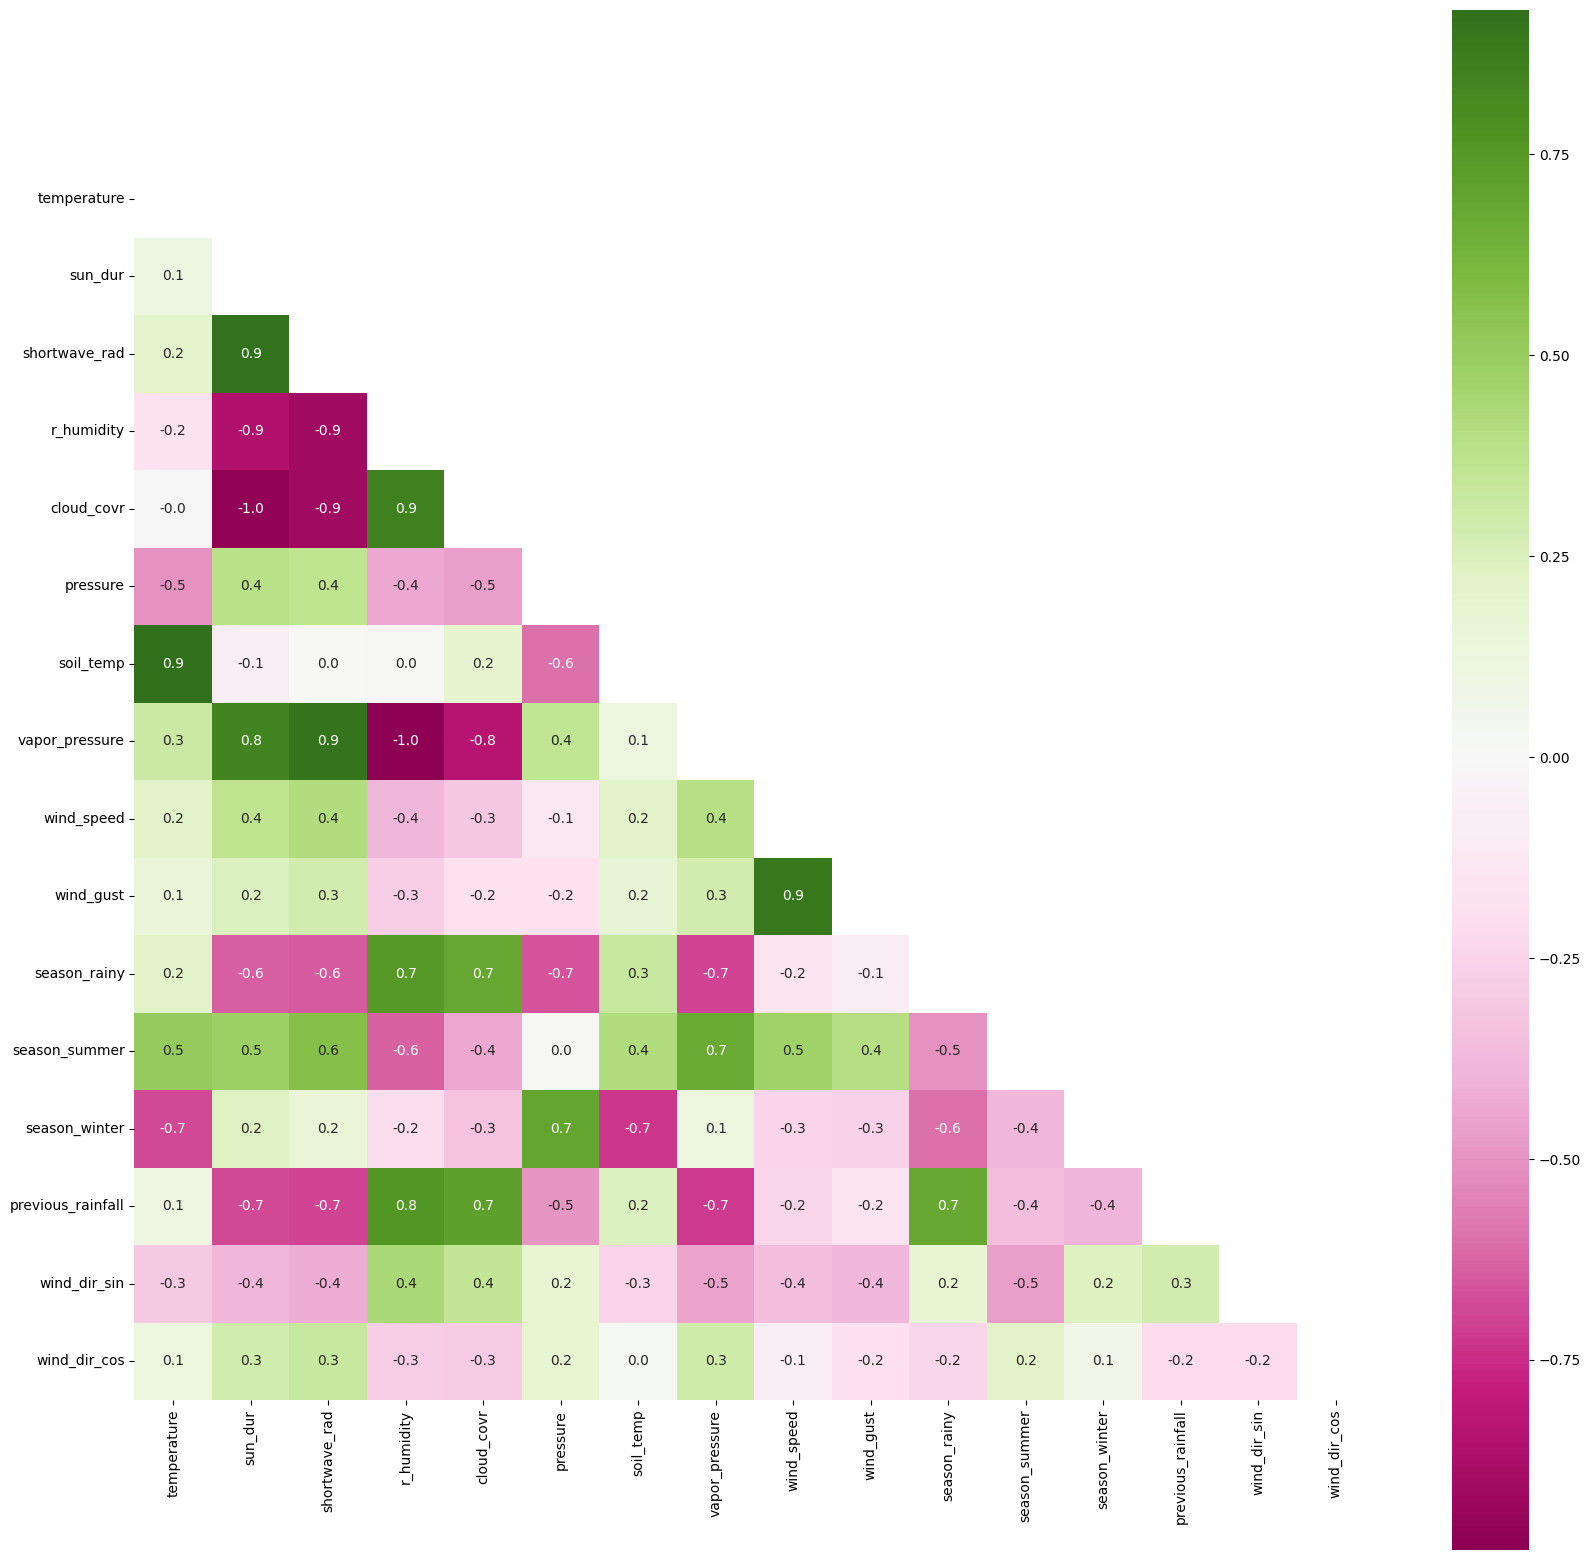

In [131]:
# Correlation plots for dataset with new features
import matplotlib.pyplot as plt
import seaborn as sns
correlations_fe = rf_1_fe.corr('spearman')
mask = np.triu(np.ones_like(correlations_fe, dtype=bool))
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations_fe, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

In [132]:
# Generate a list of highly correlated variables with cut off >= 0.8
high_corr_vars_fe = np.where(abs(correlations_fe) >= 0.8)
high_corr_vars_fe = [(correlations_fe.columns[x], correlations_fe.columns[y]) 
                        for x, y in zip(*high_corr_vars_fe) if x != y and x < y]
df_high_corr_vars_fe = pd.DataFrame({'Var_1': [x[0] for x in high_corr_vars_fe],
                                  'Var_2': [x[1] for x in high_corr_vars_fe]})
print(df_high_corr_vars_fe)

            Var_1           Var_2
0     temperature       soil_temp
1         sun_dur   shortwave_rad
2         sun_dur      r_humidity
3         sun_dur      cloud_covr
4         sun_dur  vapor_pressure
5   shortwave_rad      r_humidity
6   shortwave_rad      cloud_covr
7   shortwave_rad  vapor_pressure
8      r_humidity      cloud_covr
9      r_humidity  vapor_pressure
10     cloud_covr  vapor_pressure
11     wind_speed       wind_gust


In [133]:
# List out variables to drop
highly_correlated_list_fe = ['soil_temp','sun_dur','shortwave_rad',
                             'vapor_pressure','wind_gust', 'r_humidity']
# Dropping features
rf_1_fe.drop(highly_correlated_list_fe, axis = 1, inplace = True)

<Axes: >

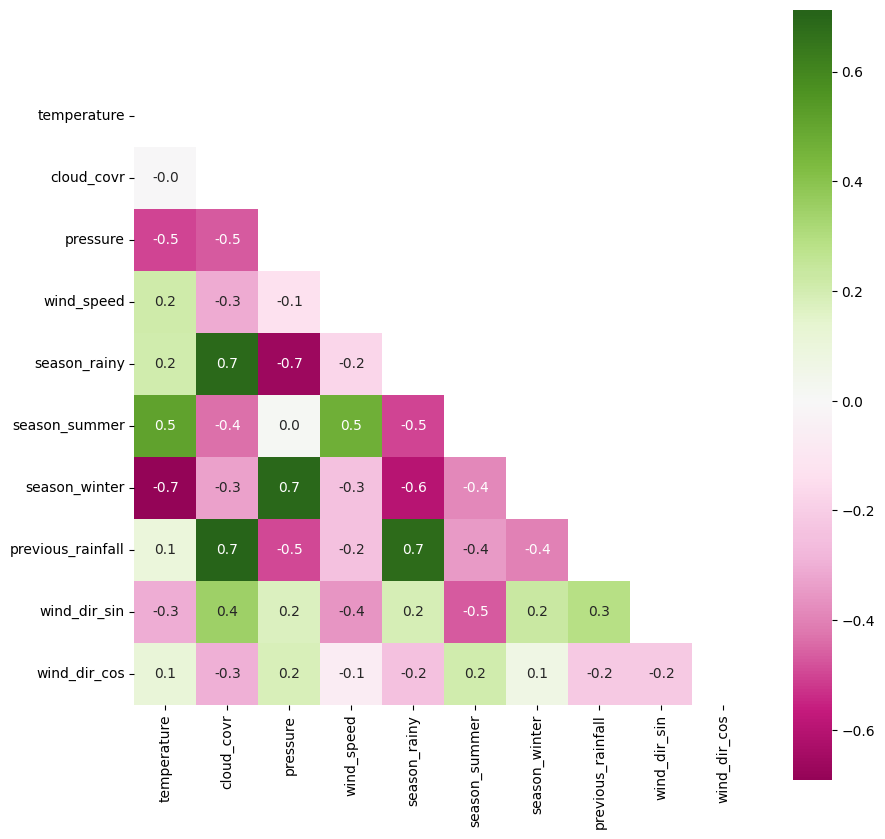

In [134]:
# Correlation plots for dataset with new features again
import matplotlib.pyplot as plt
import seaborn as sns
correlations_fe = rf_1_fe.corr('spearman')
mask = np.triu(np.ones_like(correlations_fe, dtype=bool))
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations_fe, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

In [135]:
# Merge soil_moisture & evapotrans variables to rf_1
rf_2 = pd.concat([rf_1, rf[['soil_moisture', 'evapotrans']]], axis=1)

<Axes: >

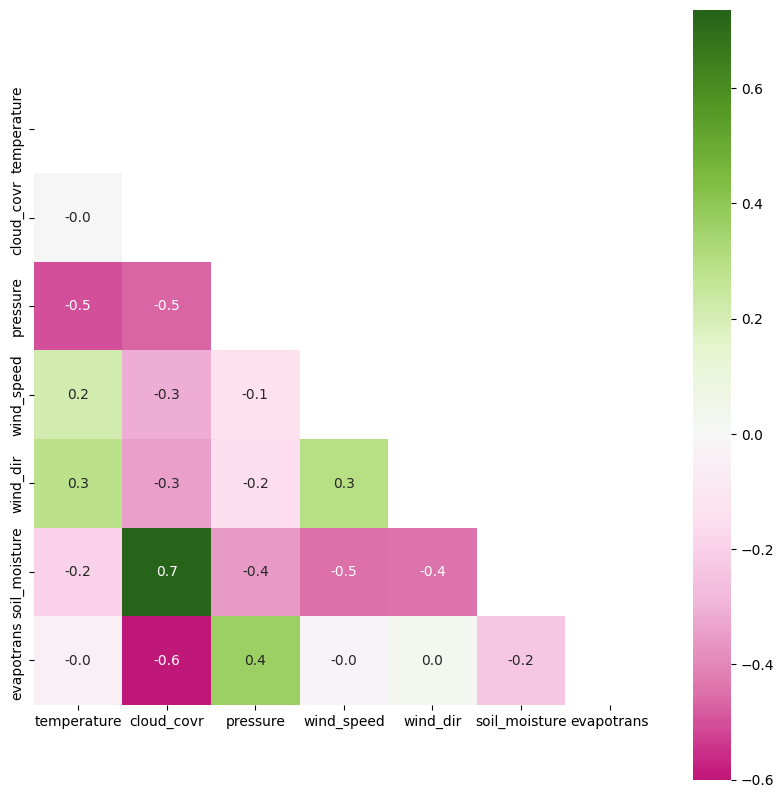

In [136]:
# Correlation plots for dataset with new features again
correlations_rf_2 = rf_2.corr('spearman')
mask = np.triu(np.ones_like(correlations_rf_2, dtype=bool))
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations_rf_2, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

In [137]:
# Merge soil_moisture & evapotrans variables to rf_1_fe
rf_2_fe = pd.concat([rf_1_fe, rf_fe[['soil_moisture', 'evapotrans']]], axis=1)

<Axes: >

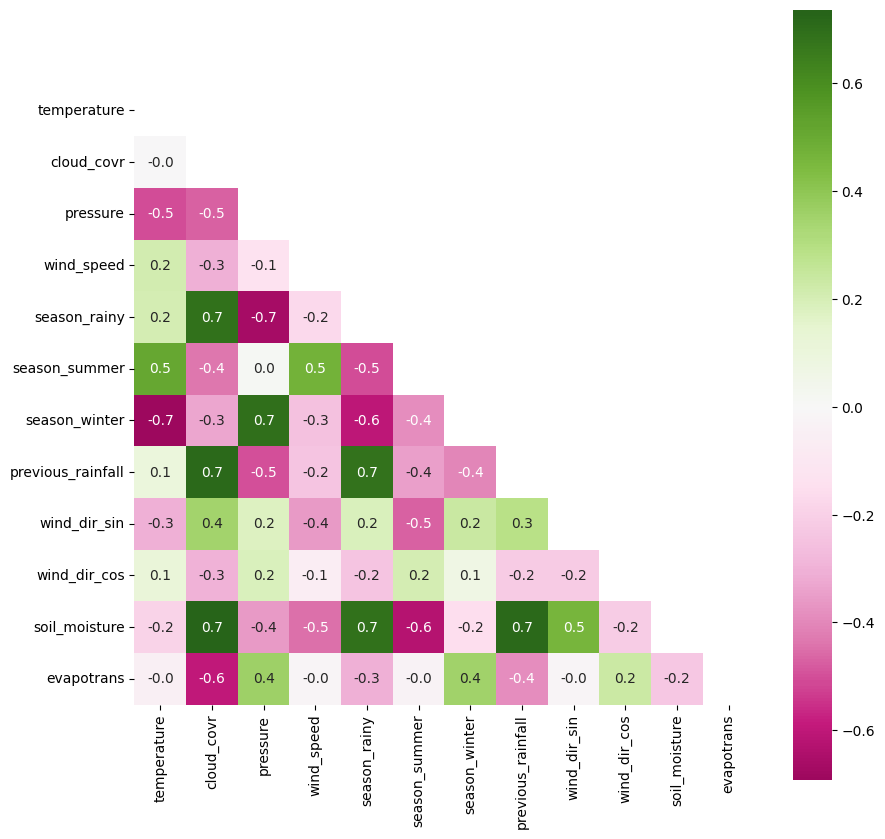

In [138]:
# Correlation plots for dataset with new features again
correlations_rf_2_fe = rf_2_fe.corr('spearman')
mask = np.triu(np.ones_like(correlations_rf_2_fe, dtype=bool))
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations_rf_2_fe, mask=mask, annot = True, cmap='PiYG', center = 0, fmt = '.1f', square = True)

#### Tree-based Feature Selection using Random Forest

For base model excluding soil_moisture & evapotrans without feature engineerd variables

In [139]:
# Import libraries for Tree-based feature selection 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [140]:
# Define dependent and independent variables
X_rf_1 = rf_1
y_rf_1 = rf['rainfall']

# Scale the features using the StandardScaler class
scaler = StandardScaler()
X_rf_1_scaled = pd.DataFrame(scaler.fit_transform(X_rf_1), columns=X_rf_1.columns)

# Initialize a random forest regressor object
rfr_rf_1 = RandomForestRegressor(random_state=42)

# Fit the random forest regressor on the dataset
rfr_rf_1.fit(X_rf_1_scaled, y_rf_1)

# Get feature importance scores
importances_rf_1 = rfr_rf_1.feature_importances_

# Create a dataframe with feature importance scores
feature_importances_rf_1 = pd.DataFrame({'Feature': X_rf_1_scaled.columns, 'Importance': importances_rf_1})

# Sort the features by importance score
feature_importances_rf_1 = feature_importances_rf_1.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_rf_1)

       Feature  Importance
1   cloud_covr    0.409339
2     pressure    0.158394
3   wind_speed    0.156995
4     wind_dir    0.150317
0  temperature    0.124954


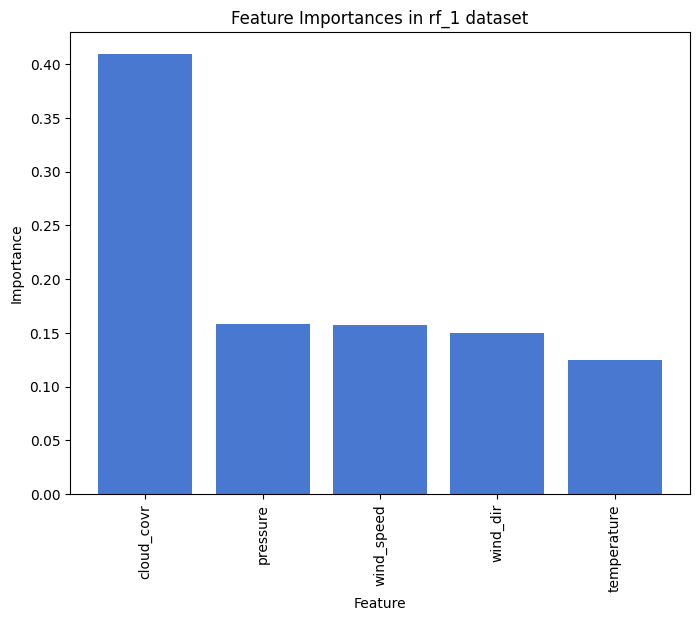

In [141]:
# Plot Feature importance in rf_1 dataset
plt.figure(figsize=(8, 6))
plt.bar(feature_importances_rf_1['Feature'], feature_importances_rf_1['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in rf_1 dataset')
plt.show()

All features will be used.

For base model excluding soil_moisture & evapotrans with feature engineerd variables

In [142]:
# Define dependent and independent variables
X_rf_1_fe = rf_1_fe
y_rf_1_fe = rf_fe['rainfall']

# Scale the features using the StandardScaler class
scaler = StandardScaler()
X_rf_1_fe_scaled = pd.DataFrame(scaler.fit_transform(X_rf_1_fe), columns=X_rf_1_fe.columns)

# Initialize a random forest regressor object
rfr_rf_1_fe = RandomForestRegressor(random_state=42)

# Fit the random forest regressor on the dataset
rfr_rf_1_fe.fit(X_rf_1_fe_scaled, y_rf_1_fe)

# Get feature importance scores
importances_rf_1_fe = rfr_rf_1_fe.feature_importances_

# Create a dataframe with feature importance scores
feature_importances_rf_1_fe = pd.DataFrame({'Feature': X_rf_1_fe_scaled.columns, 'Importance': importances_rf_1_fe})

# Sort the features by importance score
feature_importances_rf_1_fe = feature_importances_rf_1_fe.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_rf_1_fe)

             Feature  Importance
1         cloud_covr    0.392304
7  previous_rainfall    0.147349
3         wind_speed    0.120840
2           pressure    0.109564
8       wind_dir_sin    0.078362
0        temperature    0.077936
9       wind_dir_cos    0.067291
5      season_summer    0.003045
4       season_rainy    0.002182
6      season_winter    0.001127


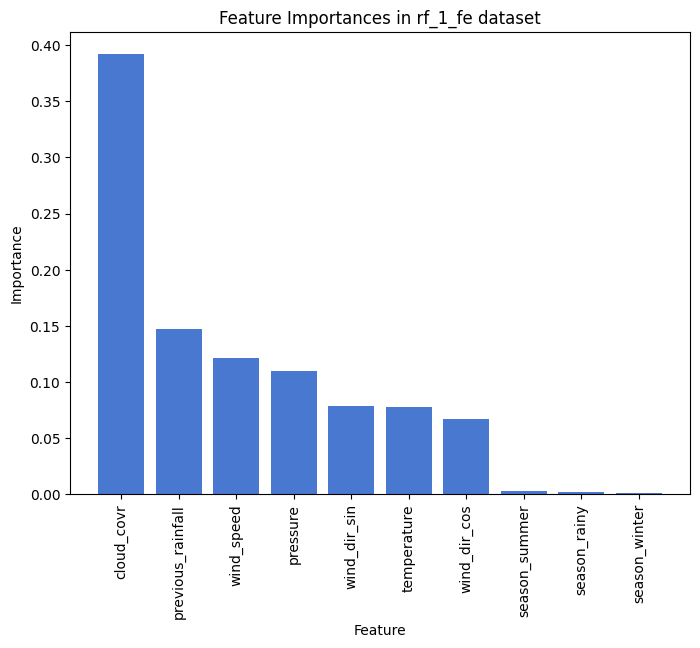

In [143]:
# Plot Feature importance in rf_1_fe dataset
plt.figure(figsize=(8, 6))
plt.bar(feature_importances_rf_1_fe['Feature'], feature_importances_rf_1_fe['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in rf_1_fe dataset')
plt.show()

For base model including soil_moisture & evapotrans without feature engineerd variables

In [144]:
# Define dependent and independent variables
X_rf_2 = rf_2
y_rf_2 = rf['rainfall']

# Scale the features using the StandardScaler class
scaler = StandardScaler()
X_rf_2_scaled = pd.DataFrame(scaler.fit_transform(X_rf_2), columns=X_rf_2.columns)

# Initialize a random forest regressor object
rfr_rf_2 = RandomForestRegressor(random_state=42)

# Fit the random forest regressor on the dataset
rfr_rf_2.fit(X_rf_2_scaled, y_rf_2)

# Get feature importance scores
importances_rf_2 = rfr_rf_2.feature_importances_

# Create a dataframe with feature importance scores
feature_importances_rf_2 = pd.DataFrame({'Feature': X_rf_2_scaled.columns, 'Importance': importances_rf_2})

# Sort the features by importance score
feature_importances_rf_2 = feature_importances_rf_2.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_rf_2)

         Feature  Importance
5  soil_moisture    0.727325
1     cloud_covr    0.076999
6     evapotrans    0.050102
0    temperature    0.043231
2       pressure    0.035273
3     wind_speed    0.034444
4       wind_dir    0.032625


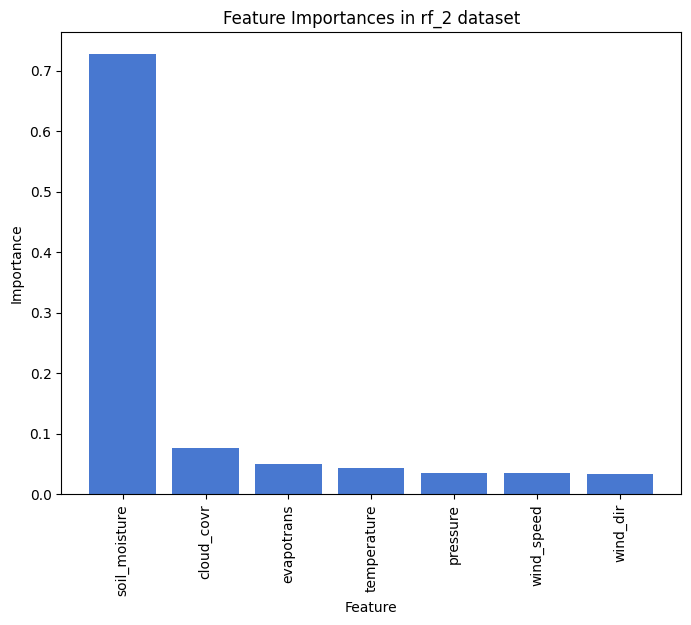

In [145]:
# Plot Feature importance in rf_2 dataset
plt.figure(figsize=(8, 6))
plt.bar(feature_importances_rf_2['Feature'], feature_importances_rf_2['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in rf_2 dataset')
plt.show()

For base model including soil_moisture & evapotrans with feature engineerd variables

In [146]:
# Define dependent and independent variables
X_rf_2_fe = rf_2_fe
y_rf_2_fe = rf_fe['rainfall']

# Scale the features using the StandardScaler class
scaler = StandardScaler()
X_rf_2_fe_scaled = pd.DataFrame(scaler.fit_transform(X_rf_2_fe), columns=X_rf_2_fe.columns)

# Initialize a random forest regressor object
rfr_rf_2_fe = RandomForestRegressor(random_state=42)

# Fit the random forest regressor on the dataset
rfr_rf_2_fe.fit(X_rf_2_fe_scaled, y_rf_2_fe)

# Get feature importance scores
importances_rf_2_fe = rfr_rf_2_fe.feature_importances_

# Create a dataframe with feature importance scores
feature_importances_rf_2_fe = pd.DataFrame({'Feature': X_rf_2_fe_scaled.columns, 'Importance': importances_rf_2_fe})

# Sort the features by importance score
feature_importances_rf_2_fe = feature_importances_rf_2_fe.sort_values('Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances_rf_2_fe)

              Feature  Importance
10      soil_moisture    0.725704
1          cloud_covr    0.072201
11         evapotrans    0.042344
0         temperature    0.035455
7   previous_rainfall    0.027285
2            pressure    0.026685
3          wind_speed    0.025143
9        wind_dir_cos    0.020527
8        wind_dir_sin    0.018692
5       season_summer    0.004308
4        season_rainy    0.001262
6       season_winter    0.000395


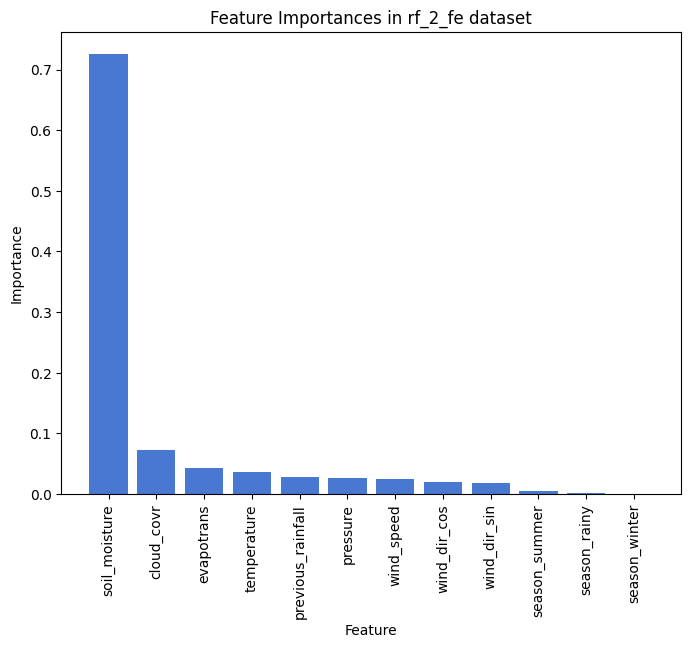

In [147]:
# Plot Feature importance in rf_2 dataset
plt.figure(figsize=(8, 6))
plt.bar(feature_importances_rf_2_fe['Feature'], feature_importances_rf_2_fe['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in rf_2_fe dataset')
plt.show()

## Normalization using Z-score method

In [148]:
from sklearn.preprocessing import StandardScaler

# Define dependent and independent variables
X_rf_1 = rf_1
y_rf_1 = rf['rainfall']

# Define dependent and independent variables & drop less importance features 
X_rf_1_fe = rf_1_fe.drop(['season_rainy', 'season_winter'], axis=1)
y_rf_1_fe = rf_fe['rainfall']

# Define dependent and independent variables
X_rf_2 = rf_2
y_rf_2 = rf['rainfall']

# Define dependent and independent variables & drop less importance features 
X_rf_2_fe = rf_2_fe.drop(['season_rainy', 'season_winter'], axis=1)
y_rf_2_fe = rf_fe['rainfall']

# Scale the features using the StandardScaler class (Z-Score Normalization)
scaler_1 = StandardScaler() # Initial the Scalar
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()
scaler_4 = StandardScaler()

# Scaling the features
X_rf_1_scaled = pd.DataFrame(scaler_1.fit_transform(X_rf_1), columns=X_rf_1.columns)
X_rf_1_fe_scaled = pd.DataFrame(scaler_2.fit_transform(X_rf_1_fe), columns=X_rf_1_fe.columns)
X_rf_2_scaled = pd.DataFrame(scaler_3.fit_transform(X_rf_2), columns=X_rf_2.columns)
X_rf_2_fe_scaled = pd.DataFrame(scaler_4.fit_transform(X_rf_2_fe), columns=X_rf_2_fe.columns)

In [149]:
# # For saving scalar for deployment
# from sklearn.preprocessing import StandardScaler
# from joblib import dump, load

# # create and fit a StandardScaler object on training data
# scaler = StandardScaler()
# scaler.fit(X_train)

# # save the scaler object using joblib
# dump(scaler, 'scaler.joblib')

# # load the saved scaler object using joblib
# scaler_loaded = load('scaler.joblib')

# # use the loaded scaler object to transform new data
# X_new_scaled = scaler_loaded.transform(X_new)

In [150]:
# Print shape of scaled dataframes
print("Scaled rf_1 dataframe shape :", X_rf_1_scaled.shape)
print("Dependet variable in rf_1 :", y_rf_1.shape)

print("Scaled rf_1_fe dataframe shape :", X_rf_1_fe_scaled.shape)
print("Dependet variable in rf_1_fe :", y_rf_1_fe.shape)

print("Scaled rf_2 dataframe shape :", X_rf_2_scaled.shape)
print("Dependet variable in rf_2 :", y_rf_2.shape)

print("Scaled rf_2_fe dataframe shape :", X_rf_2_fe_scaled.shape)
print("Dependet variable in rf_2_fe :", y_rf_2.shape)

Scaled rf_1 dataframe shape : (13514, 5)
Dependet variable in rf_1 : (13514,)
Scaled rf_1_fe dataframe shape : (13513, 8)
Dependet variable in rf_1_fe : (13513,)
Scaled rf_2 dataframe shape : (13514, 7)
Dependet variable in rf_2 : (13514,)
Scaled rf_2_fe dataframe shape : (13513, 10)
Dependet variable in rf_2_fe : (13514,)


# Data Partition

In [151]:
# Data partitioning using 70:30 ratio
# Data partition for rf_1 dataset
from sklearn.model_selection import train_test_split
X_train_rf_1, X_test_rf_1, y_train_rf_1, y_test_rf_1 = train_test_split(X_rf_1_scaled, y_rf_1, 
                                                            test_size = 0.3, random_state = 42)
print("Training set :", X_train_rf_1.shape, y_train_rf_1.shape)
print("Testing set :", X_test_rf_1.shape, y_test_rf_1.shape)

Training set : (9459, 5) (9459,)
Testing set : (4055, 5) (4055,)


In [152]:
# Data partition for rf_1_fe dataset
X_train_rf_1_fe, X_test_rf_1_fe, y_train_rf_1_fe, y_test_rf_1_fe = train_test_split(X_rf_1_fe_scaled, 
                                                     y_rf_1_fe, test_size = 0.3, random_state = 42)
print("Training set :", X_train_rf_1_fe.shape, y_train_rf_1_fe.shape)
print("Testing set :", X_test_rf_1_fe.shape, y_test_rf_1_fe.shape)

Training set : (9459, 8) (9459,)
Testing set : (4054, 8) (4054,)


In [153]:
# Data partition for rf_2 dataset
X_train_rf_2, X_test_rf_2, y_train_rf_2, y_test_rf_2 = train_test_split(X_rf_2_scaled, y_rf_2, 
                                                            test_size = 0.3, random_state = 42)
print("Training set :", X_train_rf_2.shape, y_train_rf_2.shape)
print("Testing set :", X_test_rf_2.shape, y_test_rf_2.shape)

Training set : (9459, 7) (9459,)
Testing set : (4055, 7) (4055,)


In [154]:
# Data partition for rf_2_fe dataset
X_train_rf_2_fe, X_test_rf_2_fe, y_train_rf_2_fe, y_test_rf_2_fe = train_test_split(X_rf_2_fe_scaled, 
                                                      y_rf_2_fe, test_size = 0.3, random_state = 42)
print("Training set :", X_train_rf_2_fe.shape, y_train_rf_2_fe.shape)
print("Testing set :", X_test_rf_2_fe.shape, y_test_rf_2_fe.shape)

Training set : (9459, 10) (9459,)
Testing set : (4054, 10) (4054,)


# Modelling 

- Base models without soil_moisture & Evapotrans (using rf_1 dataset)
- Base models without soil_moisture & Evapotrans (With Feature engineered variables) (rf_1_fe dataset)
- Base models with soil_moisture & Evapotrans (rf_2 dataset)
- Base models with soil_moisture & Evapotrans (With Feature engineered variables) (rf_2_fe dataset)
- Tuned models with high accuracy

#### Random Forest

In [ ]:
# Import libraries for building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Buliding Random Forest base model using rf_1 dataset
rf_reg_rf_1 = RandomForestRegressor(n_estimators=150, max_depth=10, 
                  min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_reg_rf_1.fit(X_train_rf_1, y_train_rf_1)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [ ]:
# Import library for model tuning with Randomo Search CV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [1, 2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5, 7, 10],
}

# Create a RandomForestRegressor object
rf_reg_rf_1 = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_reg_rf_1, param_distributions=param_dist,
                                   cv=10, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_rf_1, y_train_rf_1)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new RandomForestRegressor object with the best parameters
rf_reg_best_rf_1 = RandomForestRegressor(**best_params, random_state=42)

# Fit the best model to the training data
rf_reg_best_rf_1.fit(X_train_rf_1, y_train_rf_1)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=7,
                      n_estimators=50, random_state=42)

In [ ]:
# Buliding Random Forest base model using rf_1 dataset
rf_reg_rf_1 = RandomForestRegressor(n_estimators=50, max_depth=10, 
                  min_samples_leaf=7, max_features='log2', random_state=42)
rf_reg_rf_1.fit(X_train_rf_1, y_train_rf_1)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=7,
                      n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
y_train_pred_rf_1 = rf_reg_rf_1.predict(X_train_rf_1)
# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_1 = mean_squared_error(y_train_rf_1, y_train_pred_rf_1, squared=False)
mae_train_rf_1 = mean_absolute_error(y_train_rf_1, y_train_pred_rf_1)
r2_train_rf_1 = r2_score(y_train_rf_1, y_train_pred_rf_1)

# Predict on the test set
y_test_pred_rf_1 = rf_reg_rf_1.predict(X_test_rf_1)
# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_1 = mean_squared_error(y_test_rf_1, y_test_pred_rf_1, squared=False)
mae_test_rf_1 = mean_absolute_error(y_test_rf_1, y_test_pred_rf_1)
r2_test_rf_1 = r2_score(y_test_rf_1, y_test_pred_rf_1)

# Print the evaluation metrics
print("Evaluation Metrics for RF base model \nusing rf_1 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1, 4))
print("Training MAE:", round(mae_train_rf_1, 4))
print("Training R square:", round(r2_train_rf_1, 4))
print("")
print("===========TESTING SET=============")
print("Testing RMSE:", round(rmse_test_rf_1, 4))
print("Testing MAE:", round(mae_test_rf_1, 4))
print("Testing R square:", round(r2_test_rf_1, 4))

Evaluation Metrics for RF Tuned model 
using rf_1 dataset

===========TRAINING SET=============
Training RMSE: 8.666
Training MAE: 3.9308
Training R square: 0.6319

===========TESTING SET=============
Testing RMSE: 9.5212
Testing MAE: 4.4244
Testing R square: 0.4722


In [ ]:
# Print the evaluation metrics
print("Evaluation Metrics for RF tuned model \nusing rf_1 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1, 4))
print("Training MAE:", round(mae_train_rf_1, 4))
print("Training R square:", round(r2_train_rf_1, 4))
print("")
print("===========TESTING SET=============")
print("Testing RMSE:", round(rmse_test_rf_1, 4))
print("Testing MAE:", round(mae_test_rf_1, 4))
print("Testing R square:", round(r2_test_rf_1, 4))

Evaluation Metrics for RF tuned model 
using rf_1 dataset

===========TRAINING SET=============
Training RMSE: 8.666
Training MAE: 3.9308
Training R square: 0.6319

===========TESTING SET=============
Testing RMSE: 9.5212
Testing MAE: 4.4244
Testing R square: 0.4722


In [159]:
# Building Random Forest base model using rf_1_fe dataset
rf_reg_rf_1_fe = RandomForestRegressor(n_estimators=150, max_depth=10, 
                  min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_reg_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [ ]:
# Import library for RF model tuning with Randomo Search CV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [1, 2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5, 7, 10],
}

# Create a RandomForestRegressor object
rf_reg_rf_1_fe_t = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_reg_rf_1_fe_t, param_distributions=param_dist,
                                   cv=10, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_rf_1_fe, y_train_rf_1_fe)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new RandomForestRegressor object with the best parameters
rf_reg_best_rf_1_fe = RandomForestRegressor(**best_params, random_state=42)

# Fit the best model to the training data
rf_reg_best_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=10,
                      n_estimators=50, random_state=42)

In [156]:
rf_reg_rf_1_fe = RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=10,
                      n_estimators=50, random_state=42)
rf_reg_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=10,
                      n_estimators=50, random_state=42)

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict on the training set
y_train_pred_rf_1_fe = rf_reg_rf_1_fe.predict(X_train_rf_1_fe)
# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_1_fe = mean_squared_error(y_train_rf_1_fe, y_train_pred_rf_1_fe, squared=False)
mae_train_rf_1_fe = mean_absolute_error(y_train_rf_1_fe, y_train_pred_rf_1_fe)
r2_train_rf_1_fe = r2_score(y_train_rf_1_fe, y_train_pred_rf_1_fe)

# Predict on the test set
y_test_pred_rf_1_fe = rf_reg_rf_1_fe.predict(X_test_rf_1_fe)
# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_1_fe = mean_squared_error(y_test_rf_1_fe, y_test_pred_rf_1_fe, squared=False)
mae_test_rf_1_fe = mean_absolute_error(y_test_rf_1_fe, y_test_pred_rf_1_fe)
r2_test_rf_1_fe = r2_score(y_test_rf_1_fe, y_test_pred_rf_1_fe)

# Print the evaluation metrics
print("Evaluation Matrics for RF base model \nusing rf_1_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1_fe, 4))
print("Training MAE:", round(mae_train_rf_1_fe, 4))
print("Training R square:", round(r2_train_rf_1_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_1_fe, 4))
print("Testing MAE:", round(mae_test_rf_1_fe, 4))
print("Testing R square:", round(r2_test_rf_1_fe, 4))

Evaluation Matrics for RF base model 
using rf_1_fe dataset

===========TRAINING SET=============
Training RMSE: 7.3494
Training MAE: 3.2775
Training R square: 0.7202

===========TESTING SET==============
Testing RMSE: 9.8633
Testing MAE: 4.2514
Testing R square: 0.5079


In [158]:
# Print the evaluation metrics
print("Evaluation Matrics for RF Tuned model \nusing rf_1_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1_fe, 4))
print("Training MAE:", round(mae_train_rf_1_fe, 4))
print("Training R square:", round(r2_train_rf_1_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_1_fe, 4))
print("Testing MAE:", round(mae_test_rf_1_fe, 4))
print("Testing R square:", round(r2_test_rf_1_fe, 4))

Evaluation Matrics for RF Tuned model 
using rf_1_fe dataset

===========TRAINING SET=============
Training RMSE: 8.2368
Training MAE: 3.684
Training R square: 0.6486

===========TESTING SET==============
Testing RMSE: 9.8702
Testing MAE: 4.2686
Testing R square: 0.5072


In [ ]:
# Buliding Random Forest model using rf_2 dataset
rf_reg_rf_2 = RandomForestRegressor(n_estimators=150, max_depth=10, 
                  min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_reg_rf_2.fit(X_train_rf_2, y_train_rf_2)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [ ]:
# Import library for RF model tuning with Randomo Search CV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [1, 2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

# Create a RandomForestRegressor object
rf_reg_rf_2_t = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_reg_rf_2_t, param_distributions=param_dist, 
                                   cv=10, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_rf_2, y_train_rf_2)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new RandomForestRegressor object with the best parameters
rf_reg_best_rf_2 = RandomForestRegressor(**best_params, random_state=42)

# Fit the best model to the training data
rf_reg_best_rf_2.fit(X_train_rf_2, y_train_rf_2)

In [162]:
# Buliding Random Forest tuned model using rf_1 dataset
rf_reg_rf_2 = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=150, random_state=42)
rf_reg_rf_2.fit(X_train_rf_2, y_train_rf_2)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=150, random_state=42)

In [163]:
# Predict on the training set
y_train_pred_rf_2 = rf_reg_rf_2.predict(X_train_rf_2)
# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_2 = mean_squared_error(y_train_rf_2, y_train_pred_rf_2, squared=False)
mae_train_rf_2 = mean_absolute_error(y_train_rf_2, y_train_pred_rf_2)
r2_train_rf_2 = r2_score(y_train_rf_2, y_train_pred_rf_2)

# Predict on the test set
y_test_pred_rf_2 = rf_reg_rf_2.predict(X_test_rf_2)
# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_2 = mean_squared_error(y_test_rf_2, y_test_pred_rf_2, squared=False)
mae_test_rf_2 = mean_absolute_error(y_test_rf_2, y_test_pred_rf_2)
r2_test_rf_2 = r2_score(y_test_rf_2, y_test_pred_rf_2)

# Print the evaluation metrics
print("Evaluation Matrics for RF Base model \nusing rf_2 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_2, 4))
print("Training MAE:", round(mae_train_rf_2, 4))
print("Training R square:", round(r2_train_rf_2, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_2, 4))
print("Testing MAE:", round(mae_test_rf_2, 4))
print("Testing R square:", round(r2_test_rf_2, 4))

Evaluation Matrics for RF Base model 
using rf_2 dataset

===========TRAINING SET=============
Training RMSE: 3.0829
Training MAE: 1.452
Training R square: 0.9534

===========TESTING SET==============
Testing RMSE: 5.8351
Testing MAE: 2.7513
Testing R square: 0.8018


In [ ]:
# Print the evaluation metrics
print("Evaluation Matrics for RF Tuned model \nusing rf_2 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_2, 4))
print("Training MAE:", round(mae_train_rf_2, 4))
print("Training R square:", round(r2_train_rf_2, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_2, 4))
print("Testing MAE:", round(mae_test_rf_2, 4))
print("Testing R square:", round(r2_test_rf_2, 4))

In [ ]:
# Buliding Random Forest model using rf_2_fe dataset
rf_reg_rf_2_fe = RandomForestRegressor(n_estimators=150, max_depth=10, 
                  min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_reg_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [ ]:
# Import library for RF model tuning with Randomo Search CV
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [1, 2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 5, 7, 10]
}

# Create a RandomForestRegressor object
rf_reg_rf_2_fe_t = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_reg_rf_2_fe_t, param_distributions=param_dist, 
                                   cv=10, n_iter=100, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_rf_2_fe, y_train_rf_2_fe)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Create a new RandomForestRegressor object with the best parameters
rf_reg_best_rf_2_fe = RandomForestRegressor(**best_params, random_state=42)

# Fit the best model to the training data
rf_reg_best_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

In [ ]:
rf_reg_rf_2_fe = RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)
rf_reg_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)

In [ ]:
rf_reg_rf_2_fe = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=150, random_state=42)
rf_reg_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=150,
                      random_state=42)

In [ ]:
# Predict on the training set
y_train_pred_rf_2_fe = rf_reg_rf_2_fe.predict(X_train_rf_2_fe)
# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_2_fe = mean_squared_error(y_train_rf_2_fe, y_train_pred_rf_2_fe, squared=False)
mae_train_rf_2_fe = mean_absolute_error(y_train_rf_2_fe, y_train_pred_rf_2_fe)
r2_train_rf_2_fe = r2_score(y_train_rf_2_fe, y_train_pred_rf_2_fe)

# Predict on the test set
y_test_pred_rf_2_fe = rf_reg_rf_2_fe.predict(X_test_rf_2_fe)
# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_2_fe = mean_squared_error(y_test_rf_2_fe, y_test_pred_rf_2_fe, squared=False)
mae_test_rf_2_fe = mean_absolute_error(y_test_rf_2_fe, y_test_pred_rf_2_fe)
r2_test_rf_2_fe = r2_score(y_test_rf_2_fe, y_test_pred_rf_2_fe)

# Print the evaluation metrics
print("Evaluation Metrics for RF base model \nusing rf_2_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_2_fe, 4))
print("Training MAE:", round(mae_train_rf_2_fe, 4))
print("Training R square:", round(r2_train_rf_2_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_2_fe, 4))
print("Testing MAE:", round(mae_test_rf_2_fe, 4))
print("Testing R square:", round(r2_test_rf_2_fe, 4))

Evaluation Metrics for RF base model 
using rf_2_fe dataset

===========TRAINING SET=============
Training RMSE: 4.445
Training MAE: 2.1285
Training R square: 0.8977

===========TESTING SET==============
Testing RMSE: 5.9551
Testing MAE: 2.7508
Testing R square: 0.8206


#### Support Vector Machine

In [ ]:
# Import libraries for building Support Vector Regressor
from sklearn.svm import SVR
import numpy as np

# Set random_state = 42
np.random.seed(42) 

In [ ]:
# Building SVR base model with RBF kernel using rf_1 dataset
svr_rf_1 = SVR(kernel='rbf')
svr_rf_1.fit(X_train_rf_1, y_train_rf_1)

SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

# SVR class with RBF kernel
svr_rbf_rf_1 = SVR(kernel='rbf')

# Define the grid search object
grid_search = GridSearchCV(svr_rbf_rf_1, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_rf_1, y_train_rf_1)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:', best_params)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_rf_1)

Best hyperparameters: {'C': 10, 'gamma': 1}


In [ ]:
# SVR class with RBF kernel and best hyperparameters
np.random.seed(42)
svr_rf_1 = SVR(kernel='rbf', C=10, gamma=1)
svr_rf_1.fit(X_train_rf_1, y_train_rf_1)

SVR(C=10, gamma=1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
y_train_pred_rf_1 = svr_rf_1.predict(X_train_rf_1)

# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_1 = mean_squared_error(y_train_rf_1, y_train_pred_rf_1, squared=False)
mae_train_rf_1 = mean_absolute_error(y_train_rf_1, y_train_pred_rf_1)
r2_train_rf_1 = r2_score(y_train_rf_1, y_train_pred_rf_1)

# Predict on the test set
y_test_pred_rf_1 = svr_rf_1.predict(X_test_rf_1)

# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_1 = mean_squared_error(y_test_rf_1, y_test_pred_rf_1, squared=False)
mae_test_rf_1 = mean_absolute_error(y_test_rf_1, y_test_pred_rf_1)
r2_test_rf_1 = r2_score(y_test_rf_1, y_test_pred_rf_1)

# Print the evaluation metrics
print("Evaluation Metrics for SVR base model \nusing rf_1 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1, 4))
print("Training MAE:", round(mae_train_rf_1, 4))
print("Training R square:", round(r2_train_rf_1, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_1, 4))
print("Testing MAE:", round(mae_test_rf_1, 4))
print("Testing R square:", round(r2_test_rf_1, 4))

Evaluation Metrics for SVR base model 
using rf_1 dataset

===========TRAINING SET=============
Training RMSE: 11.4541
Training MAE: 4.673
Training R square: 0.3569

===========TESTING SET==============
Testing RMSE: 10.4504
Testing MAE: 4.2689
Testing R square: 0.3642


In [ ]:
# Building SVR base model with RBF kernel using rf_1_fe dataset
svr_rf_1_fe = SVR(kernel='rbf')
svr_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe)

SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

# SVR class with RBF kernel
svr_rf_1_fe_t = SVR(kernel='rbf')

# Define the grid search object
grid_search = GridSearchCV(svr_rf_1_fe_t, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_rf_1_fe, y_train_rf_1_fe)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:', best_params)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_rf_1_fe)

Best hyperparameters: {'C': 10, 'gamma': 0.1}


In [ ]:
# SVR class with RBF kernel and best hyperparameters
np.random.seed(42)
svr_rf_1_fe = SVR(kernel='rbf', C=10, gamma=0.1)
svr_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe)

SVR(C=10, gamma=0.1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
y_train_pred_rf_1_fe = svr_rf_1_fe.predict(X_train_rf_1_fe)

# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_1_fe = mean_squared_error(y_train_rf_1_fe, y_train_pred_rf_1_fe, squared=False)
mae_train_rf_1_fe = mean_absolute_error(y_train_rf_1_fe, y_train_pred_rf_1_fe)
r2_train_rf_1_fe = r2_score(y_train_rf_1_fe, y_train_pred_rf_1_fe)

# Predict on the test set
y_test_pred_rf_1_fe = svr_rf_1_fe.predict(X_test_rf_1_fe)

# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_1_fe = mean_squared_error(y_test_rf_1_fe, y_test_pred_rf_1_fe, squared=False)
mae_test_rf_1_fe = mean_absolute_error(y_test_rf_1_fe, y_test_pred_rf_1_fe)
r2_test_rf_1_fe = r2_score(y_test_rf_1_fe, y_test_pred_rf_1_fe)

# Print the evaluation metrics
print("Evaluation Metrics for SVR base model \nusing rf_1_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_1_fe, 4))
print("Training MAE:", round(mae_train_rf_1_fe, 4))
print("Training R square:", round(r2_train_rf_1_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_1_fe, 4))
print("Testing MAE:", round(mae_test_rf_1_fe, 4))
print("Testing R square:", round(r2_test_rf_1_fe, 4))

Evaluation Metrics for SVR base model 
using rf_1_fe dataset

===========TRAINING SET=============
Training RMSE: 10.828
Training MAE: 4.3593
Training R square: 0.3927

===========TESTING SET==============
Testing RMSE: 11.1621
Testing MAE: 4.3579
Testing R square: 0.3697


In [ ]:
# Building SVR base model with RBF kernel using rf_2 dataset
svr_rf_2 = SVR(kernel='rbf')
svr_rf_2.fit(X_train_rf_2, y_train_rf_2)

SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

# SVR class with RBF kernel
svr_rf_2_t = SVR(kernel='rbf')

# Define the grid search object
grid_search = GridSearchCV(svr_rf_2_t, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_rf_2, y_train_rf_2)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:', best_params)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_rf_2)

Best hyperparameters: {'C': 10, 'gamma': 'scale'}


In [ ]:
# SVR class with RBF kernel and best hyperparameters
np.random.seed(42)
svr_rf_2 = SVR(kernel='rbf', C=10, gamma='scale')
svr_rf_2.fit(X_train_rf_2, y_train_rf_2)

SVR(C=10)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
y_train_pred_rf_2 = svr_rf_2.predict(X_train_rf_2)
# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_2 = mean_squared_error(y_train_rf_2, y_train_pred_rf_2, squared=False)
mae_train_rf_2 = mean_absolute_error(y_train_rf_2, y_train_pred_rf_2)
r2_train_rf_2 = r2_score(y_train_rf_2, y_train_pred_rf_2)

# Predict on the test set
y_test_pred_rf_2 = svr_rf_2.predict(X_test_rf_2)
# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_2 = mean_squared_error(y_test_rf_2, y_test_pred_rf_2, squared=False)
mae_test_rf_2 = mean_absolute_error(y_test_rf_2, y_test_pred_rf_2)
r2_test_rf_2 = r2_score(y_test_rf_2, y_test_pred_rf_2)

# Print the evaluation metrics
print("Evaluation Metrics for SVR base model \nusing rf_2 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_2, 4))
print("Training MAE:", round(mae_train_rf_2, 4))
print("Training R square:", round(r2_train_rf_2, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_2, 4))
print("Testing MAE:", round(mae_test_rf_2, 4))
print("Testing R square:", round(r2_test_rf_2, 4))

Evaluation Metrics for SVR base model 
using rf_2 dataset

===========TRAINING SET=============
Training RMSE: 8.9493
Training MAE: 3.7154
Training R square: 0.6074

===========TESTING SET==============
Testing RMSE: 8.2212
Testing MAE: 3.4168
Testing R square: 0.6065


In [ ]:
# Building SVR base model with RBF kernel using rf_2_fe dataset
svr_rf_2_fe = SVR(kernel='rbf')
svr_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

# SVR class with RBF kernel
svr_rf_2_fe_t = SVR(kernel='rbf')

# Define the grid search object
grid_search = GridSearchCV(svr_rf_2_fe_t, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train_rf_2_fe, y_train_rf_2_fe)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters:', best_params)

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_rf_2_fe)

Best hyperparameters: {'C': 10, 'gamma': 0.1}


In [ ]:
# SVR class with RBF kernel with best parameters
np.random.seed(42)
svr_rf_2_fe = SVR(kernel='rbf', C=10, gamma=0.1)
svr_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe)

SVR(C=10, gamma=0.1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the training set
y_train_pred_rf_2_fe = svr_rf_2_fe.predict(X_train_rf_2_fe)

# Calculate RMSE, MAE, and R square for training set
rmse_train_rf_2_fe = mean_squared_error(y_train_rf_2_fe, y_train_pred_rf_2_fe, squared=False)
mae_train_rf_2_fe = mean_absolute_error(y_train_rf_2_fe, y_train_pred_rf_2_fe)
r2_train_rf_2_fe = r2_score(y_train_rf_2_fe, y_train_pred_rf_2_fe)

# Predict on the test set
y_test_pred_rf_2_fe = svr_rf_2_fe.predict(X_test_rf_2_fe)

# Calculate RMSE, MAE, and R square for test set
rmse_test_rf_2_fe = mean_squared_error(y_test_rf_2_fe, y_test_pred_rf_2_fe, squared=False)
mae_test_rf_2_fe = mean_absolute_error(y_test_rf_2_fe, y_test_pred_rf_2_fe)
r2_test_rf_2_fe = r2_score(y_test_rf_2_fe, y_test_pred_rf_2_fe)

# Print the evaluation metrics
print("Evaluation Metrics for SVR base model \nusing rf_2_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(rmse_train_rf_2_fe, 4))
print("Training MAE:", round(mae_train_rf_2_fe, 4))
print("Training R square:", round(r2_train_rf_2_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(rmse_test_rf_2_fe, 4))
print("Testing MAE:", round(mae_test_rf_2_fe, 4))
print("Testing R square:", round(r2_test_rf_2_fe, 4))

Evaluation Metrics for SVR base model 
using rf_2_fe dataset

===========TRAINING SET=============
Training RMSE: 8.9049
Training MAE: 3.6502
Training R square: 0.5893

===========TESTING SET==============
Testing RMSE: 9.3184
Testing MAE: 3.6644
Testing R square: 0.5607


#### Artificial Neural Network

In [ ]:
# Import libraies for buliding ANN models 
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Set random state = 42
np.random.seed(42)

In [ ]:
# Building ANN base model using rf_1 dataset

# Define the model
ANN_rf_1 = Sequential()
ANN_rf_1.add(Dense(64, input_dim=5, activation='relu'))
ANN_rf_1.add(Dense(64, activation='relu'))
ANN_rf_1.add(Dense(1, activation='linear'))

# Compile the model
ANN_rf_1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN_rf_1.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_1.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Test loss: 91.83589172363281


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model
ANN_rf_1 = keras.Sequential([
    keras.layers.Dense(64, input_dim=5, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
ANN_rf_1.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = ANN_rf_1.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_1.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

# Get the predicted values
y_pred = ANN_rf_1.predict(X_test_rf_1)

# Calculate the RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rf_1, y_pred))
print('Test RMSE:', rmse)


Test loss: 91.03883361816406
127/127 [==============================] - 0s 2ms/step
Test RMSE: 9.541427385474949


In [ ]:
pip install keras-tuner

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K
from kerastuner.tuners import RandomSearch

import numpy as np

np.random.seed(42)

# Define the model builder function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    input_dim=5,
                    activation='relu'))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i+1), min_value=32, max_value=128, step=32),
                        activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error',
                  optimizer=Adam(
                      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  metrics=['mean_squared_error'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project')

# Perform the search
tuner.search(X_train_rf_1, y_train_rf_1,
             epochs=100,
             validation_data=(X_train_rf_1, y_train_rf_1),
             verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model on the test data
test_loss = best_model.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Trial 10 Complete [00h 09m 32s]
val_mean_squared_error: 71.35789489746094

Best val_mean_squared_error So Far: 68.79759216308594
Total elapsed time: 01h 13m 17s
Test loss: [112.2302017211914, 112.2302017211914]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import KFold

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), input_dim=5, activation='relu'))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dense(units=1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

# Instantiate the random search tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='ANN_hyperparam_tuning')

# Define 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform the hyperparameter search with cross-validation
for train_index, test_index in kfold.split(X_train_rf_1, y_train_rf_1):
    train_data = X_train_rf_1[train_index], y_train_rf_1[train_index]
    val_data = X_train_rf_1[test_index], y_train_rf_1[test_index]
    tuner.search(x=X_train_rf_1[train_index], y=y_train_rf_1[train_index],
             epochs=50,
             validation_data=(X_train_rf_1[test_index], y_train_rf_1[test_index]),
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Print the best hyperparameters and test loss
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)
test_loss = model.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)
print('Test loss:', test_loss)
print('Best hyperparameters:', best_hps)


Trial 10 Complete [00h 01m 48s]
val_mean_squared_error: 86.92445882161458

Best val_mean_squared_error So Far: 85.09993235270183
Total elapsed time: 00h 16m 51s
Test loss: [96.9698257446289, 96.9698257446289]
Best hyperparameters: <keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f201dee94f0>


In [ ]:
!pip install --upgrade keras-tuner

In [ ]:
np.random.seed(42)

# Define the model
ANN_rf_1 = Sequential()

for i in range(best_hp.get('num_layers')):
    ANN_rf_1.add(Dense(units=best_hp.get('units_' + str(i+1)), input_dim=5, activation='relu'))

ANN_rf_1.add(Dense(1, activation='linear'))

# Compile the model with the best learning rate
ANN_rf_1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=best_hp.get('learning_rate')))

# Train the model
ANN_rf_1.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_1.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Test loss: 95.88339233398438


In [ ]:
from tensorflow.keras.layers import Dropout

np.random.seed(42)

# Define the model
ANN_rf_1 = Sequential()

for i in range(best_hp.get('num_layers')):
    ANN_rf_1.add(Dense(units=best_hp.get('units_' + str(i+1)), input_dim=5, activation='relu'))
    ANN_rf_1.add(Dropout(0.2))  # add dropout with 20% probability

ANN_rf_1.add(Dense(1, activation='linear'))

# Compile the model with the best learning rate
ANN_rf_1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=best_hp.get('learning_rate')))

# Train the model
ANN_rf_1.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_1.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)


Test loss: 95.51103973388672


In [ ]:
ANN_rf_1.save('ANN_rf_1.h5')

In [ ]:
np.random.seed(42)

# Define the model with best hyperparameters
def build_tuned_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), input_dim=5, activation='relu'))
    model.add(layers.Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(layers.Dense(units=1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
tuned_model = build_tuned_model(best_hps)

# Transfer the weights from the base model to the tuned model
for layer, tuned_layer in zip(ANN_rf_1.layers, tuned_model.layers):
    tuned_layer.set_weights(layer.get_weights())

# Compile the tuned model
tuned_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the tuned model
tuned_model.fit(X_train_rf_1, y_train_rf_1, epochs=100, batch_size=32, verbose=0)

# Evaluate the tuned model on the test data
test_loss = tuned_model.evaluate(X_test_rf_1, y_test_rf_1, verbose=0)

# Print the test loss
print('Test loss:', test_loss)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions for training and testing set
y_train_pred_rf_1 = ANN_rf_1.predict(X_train_rf_1)
y_test_pred_rf_1 = ANN_rf_1.predict(X_test_rf_1)

# Calculate RMSE for training and testing set
train_rmse_rf_1 = np.sqrt(mean_squared_error(y_train_rf_1, y_train_pred_rf_1))
test_rmse_rf_1 = np.sqrt(mean_squared_error(y_test_rf_1, y_test_pred_rf_1))

# Calculate MAE for training and testing set
train_mae_rf_1 = mean_absolute_error(y_train_rf_1, y_train_pred_rf_1)
test_mae_rf_1 = mean_absolute_error(y_test_rf_1, y_test_pred_rf_1)

# Calculate R-squared for training and testing set
train_r2_rf_1 = r2_score(y_train_rf_1, y_train_pred_rf_1)
test_r2_rf_1 = r2_score(y_test_rf_1, y_test_pred_rf_1)

# Print the evaluation metrics 
print("Evaluation Metrics for ANN base model \nusing rf_1 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(train_rmse_rf_1, 4))
print("Training MAE:", round(train_mae_rf_1, 4))
print("Training R square:", round(train_r2_rf_1, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(test_rmse_rf_1, 4))
print("Testing MAE:", round(test_mae_rf_1, 4))
print("Testing R square:", round(test_r2_rf_1, 4))

127/127 [==============================] - 0s 2ms/step
Evaluation Metrics for ANN base model 
using rf_1 dataset

===========TRAINING SET=============
Training RMSE: 9.6479
Training MAE: 4.5833
Training R square: 0.5438

===========TESTING SET==============
Testing RMSE: 9.5831
Testing MAE: 4.574
Testing R square: 0.4653


===============================


In [ ]:
# Building ANN base model using rf_1_fe dataset

# Define the model
ANN_rf_1_fe = Sequential()
ANN_rf_1_fe.add(Dense(64, input_dim=8, activation='relu'))
ANN_rf_1_fe.add(Dense(64, activation='relu'))
ANN_rf_1_fe.add(Dense(1, activation='linear'))

# Compile the model
ANN_rf_1_fe.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN_rf_1_fe.fit(X_train_rf_1_fe, y_train_rf_1_fe, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_1_fe.evaluate(X_test_rf_1_fe, y_test_rf_1_fe, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Test loss: 98.15483093261719


In [ ]:
import keras
ANN_rf_1_fe.save('ANN_rf_1_fe.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions for training and testing set
y_train_pred_rf_1_fe = ANN_rf_1_fe.predict(X_train_rf_1_fe)
y_test_pred_rf_1_fe = ANN_rf_1_fe.predict(X_test_rf_1_fe)

# Calculate RMSE for training and testing set
train_rmse_rf_1_fe = np.sqrt(mean_squared_error(y_train_rf_1_fe, y_train_pred_rf_1_fe))
test_rmse_rf_1_fe = np.sqrt(mean_squared_error(y_test_rf_1_fe, y_test_pred_rf_1_fe))

# Calculate MAE for training and testing set
train_mae_rf_1_fe = mean_absolute_error(y_train_rf_1_fe, y_train_pred_rf_1_fe)
test_mae_rf_1_fe = mean_absolute_error(y_test_rf_1_fe, y_test_pred_rf_1_fe)

# Calculate R-squared for training and testing set
train_r2_rf_1_fe = r2_score(y_train_rf_1_fe, y_train_pred_rf_1_fe)
test_r2_rf_1_fe = r2_score(y_test_rf_1_fe, y_test_pred_rf_1_fe)

# Print the evaluation metrics 
print("Evaluation Metrics for ANN base model \nusing rf_1_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(train_rmse_rf_1_fe, 4))
print("Training MAE:", round(train_mae_rf_1_fe, 4))
print("Training R square:", round(train_r2_rf_1_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(test_rmse_rf_1_fe, 4))
print("Testing MAE:", round(test_mae_rf_1_fe, 4))
print("Testing R square:", round(test_r2_rf_1_fe, 4))

127/127 [==============================] - 0s 2ms/step
Evaluation Metrics for ANN base model 
using rf_1_fe dataset

===========TRAINING SET=============
Training RMSE: 8.8575
Training MAE: 3.9939
Training R square: 0.5936

===========TESTING SET==============
Testing RMSE: 9.9073
Testing MAE: 4.2285
Testing R square: 0.5035


In [ ]:
# Building ANN base model using rf_2 dataset

# Define the model
ANN_rf_2 = Sequential()
ANN_rf_2.add(Dense(64, input_dim=7, activation='relu'))
ANN_rf_2.add(Dense(64, activation='relu'))
ANN_rf_2.add(Dense(1, activation='linear'))

# Compile the model
ANN_rf_2.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN_rf_2.fit(X_train_rf_2, y_train_rf_2, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_2.evaluate(X_test_rf_2, y_test_rf_2, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Test loss: 32.10271072387695


In [ ]:
import keras
ANN_rf_2.save('ANN_rf_2.h5')


In [ ]:
from keras.models import load_model

loaded_model_test = load_model('ANN_rf_2.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions for training and testing set
y_train_pred_rf_2 = ANN_rf_2.predict(X_train_rf_2)
y_test_pred_rf_2 = ANN_rf_2.predict(X_test_rf_2)

# Calculate RMSE for training and testing set
train_rmse_rf_2 = np.sqrt(mean_squared_error(y_train_rf_2, y_train_pred_rf_2))
test_rmse_rf_2 = np.sqrt(mean_squared_error(y_test_rf_2, y_test_pred_rf_2))

# Calculate MAE for training and testing set
train_mae_rf_2 = mean_absolute_error(y_train_rf_2, y_train_pred_rf_2)
test_mae_rf_2 = mean_absolute_error(y_test_rf_2, y_test_pred_rf_2)

# Calculate R-squared for training and testing set
train_r2_rf_2 = r2_score(y_train_rf_1, y_train_pred_rf_2)
test_r2_rf_2 = r2_score(y_test_rf_1, y_test_pred_rf_2)

# Print the evaluation metrics 
print("Evaluation Metrics for ANN base model \nusing rf_2 dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:"   , round(train_rmse_rf_2, 4))
print("Training MAE:"    , round(train_mae_rf_2, 4))
print("Training R square:", round(train_r2_rf_2, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:"    , round(test_rmse_rf_2, 4))
print("Testing MAE:"     , round(test_mae_rf_2, 4))
print("Testing R square:", round(test_r2_rf_2, 4))

127/127 [==============================] - 0s 1ms/step
Evaluation Metrics for ANN base model 
using rf_2 dataset

===========TRAINING SET=============
Training RMSE: 5.3583
Training MAE: 2.8372
Training R square: 0.8593

===========TESTING SET==============
Testing RMSE: 5.6659
Testing MAE: 2.877
Testing R square: 0.8131


In [ ]:
# Building ANN base model using rf_2_fe dataset

# Define the model
ANN_rf_2_fe = Sequential()
ANN_rf_2_fe.add(Dense(64, input_dim=10, activation='relu'))
ANN_rf_2_fe.add(Dense(64, activation='relu'))
ANN_rf_2_fe.add(Dense(1, activation='linear'))

# Compile the model
ANN_rf_2_fe.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN_rf_2_fe.fit(X_train_rf_2_fe, y_train_rf_2_fe, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
test_loss = ANN_rf_2_fe.evaluate(X_test_rf_2_fe, y_test_rf_2_fe, verbose=0)

# Print the test loss
print('Test loss:', test_loss)

Test loss: 34.38838195800781


In [ ]:
ANN_rf_2_fe.save('ANN_rf_2_fe.h5')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate predictions for training and testing set
y_train_pred_rf_2_fe = ANN_rf_2_fe.predict(X_train_rf_2_fe)
y_test_pred_rf_2_fe = ANN_rf_2_fe.predict(X_test_rf_2_fe)

# Calculate RMSE for training and testing set
train_rmse_rf_2_fe = np.sqrt(mean_squared_error(y_train_rf_2_fe, y_train_pred_rf_2_fe))
test_rmse_rf_2_fe = np.sqrt(mean_squared_error(y_test_rf_2_fe, y_test_pred_rf_2_fe))

# Calculate MAE for training and testing set
train_mae_rf_2_fe = mean_absolute_error(y_train_rf_2_fe, y_train_pred_rf_2_fe)
test_mae_rf_2_fe = mean_absolute_error(y_test_rf_2_fe, y_test_pred_rf_2_fe)

# Calculate R-squared for training and testing set
train_r2_rf_2_fe = r2_score(y_train_rf_2_fe, y_train_pred_rf_2_fe)
test_r2_rf_2_fe = r2_score(y_test_rf_2_fe, y_test_pred_rf_2_fe)

# Print the evaluation metrics 
print("Evaluation Metrics for ANN base model \nusing rf_2_fe dataset\n")
print("===========TRAINING SET=============")
print("Training RMSE:", round(train_rmse_rf_2_fe, 4))
print("Training MAE:", round(train_mae_rf_2_fe, 4))
print("Training R square:", round(train_r2_rf_2_fe, 4))
print("")
print("===========TESTING SET==============")
print("Testing RMSE:", round(test_rmse_rf_2_fe, 4))
print("Testing MAE:", round(test_mae_rf_2_fe, 4))
print("Testing R square:", round(test_r2_rf_2_fe, 4))

127/127 [==============================] - 0s 1ms/step
Evaluation Metrics for ANN base model 
using rf_2_fe dataset

===========TRAINING SET=============
Training RMSE: 5.1182
Training MAE: 2.5406
Training R square: 0.8643

===========TESTING SET==============
Testing RMSE: 5.8642
Testing MAE: 2.7724
Testing R square: 0.826


In [ ]:
# Saving scalar for deployment
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

# create and fit a StandardScaler object on training data
scaler = StandardScaler()
scaler.fit(X_train)

# save the scaler object using joblib
dump(scaler, 'scaler.joblib')

# load the saved scaler object using joblib
scaler_loaded = load('scaler.joblib')

# use the loaded scaler object to transform new data
X_new_scaled = scaler_loaded.transform(X_new)
